# Compare Hmov vs spnoise models

## Setup

In [1]:
run -im djd.main -- --dbname=dj_lisa --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_lisa' as 'write@10.153.173.165'


In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats

from djd.plot import cm2inch, adjust_spines
from djd.glms import plot_model, get_best_model

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
## Update plot parameters
# Option 1: Update general pars from modified matplotlibrc file
# plt.rcParams.update(mpl.rc_params_from_file('../../matplotlibrc', fail_on_error=False, use_default_template=True))

# Option 2: Dynamically update general pars (use if not updating from modified matplotlibrc)
plt.rcParams.update({
    'figure.dpi': 150,
    'figure.max_open_warning': 0, 
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'axes.labelsize': 'medium',
    'font.sans-serif': ['Arial'],
    'pdf.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    'ps.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    })


# Dynamically update plot-specific pars
plt.rcParams.update({
    'figure.dpi': 150,
    'figure.max_open_warning': 0,
    'font.size': 8,
    'axes.labelsize': 7.0,
    'axes.titlesize': 8,
    'legend.fontsize': 7,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,    
    })

In [8]:
# Make figure directory unless it already exists
fig_dir = os.path.join(os.getcwd(), 'figs')  # os.path.dirname(__file__) would give DJD path
if not os.path.exists(fig_dir):
    print(f"Making figure save directory:/n{fig_dir}")
    os.makedirs(fig_dir)

Making figure save directory: /Users/ybauer/code/hollymov_code/hmov_code/hmov_vs_spnoise_models/figs


## Plot hmov vs spnoise models for example cell

### Option 1: Define specific hmov and spnoise param keys

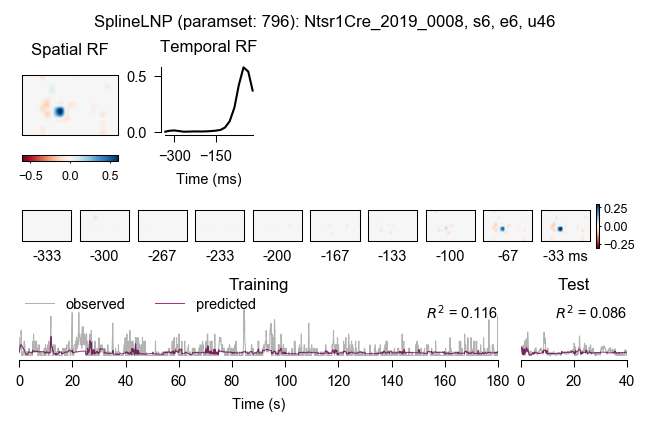

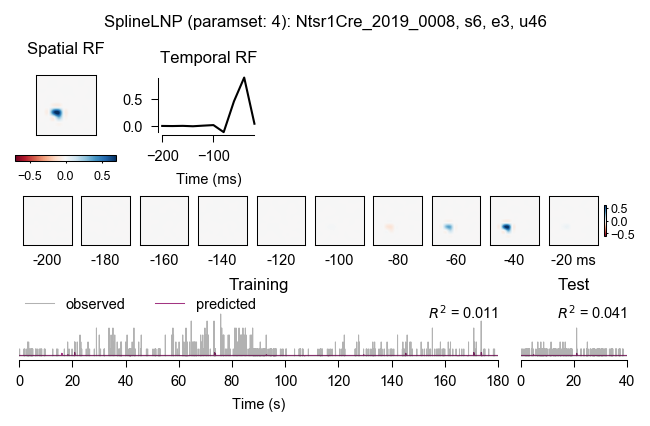

In [11]:
hmov_key = {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 46, 'spl_paramset': 796}
sn_key = {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 46, 'spl_paramset': 4}

fig, ax = plot_model(hmov_key, title=True)
fig, ax = plot_model(sn_key, title=True)

### Option 2: Define ukey and find best model for hmov and spnoise

hmov key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 46, 'spl_paramset': 796}
  hmov RF pos (x,y): (8, 5)
  hmov RF QI: 0.812102
  hmov RF area: 138.042
spnoise key: {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 46, 'spl_paramset': 4}
  spnoise RF pos (x,y): (4, 4)
  spnoise RF QI: 0.774406
  spnoise RF area: 99.283
Saving file to ./figs/hmov_model_Ntsr1Cre_2019_0008_s6_u46.pdf
Saving file to ./figs/sn_model_Ntsr1Cre_2019_0008_s6_u46.pdf


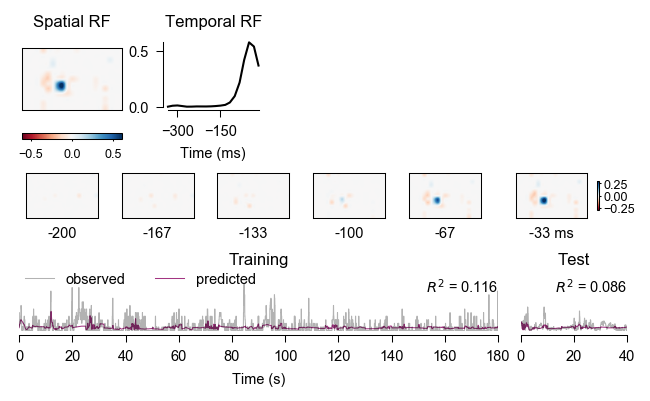

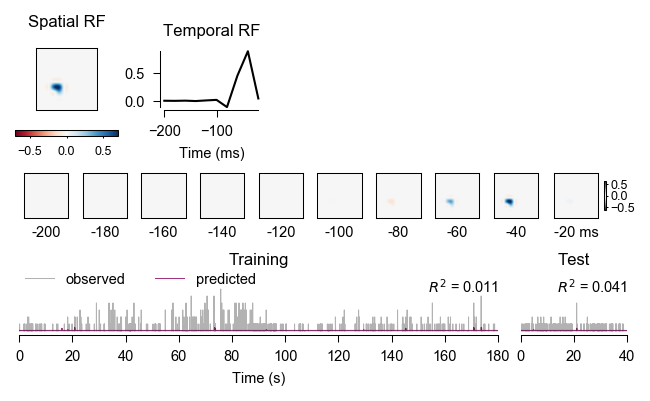

In [19]:
# Define unit key
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'u': 46}

## Plot best hmov model
# Restrict to models with stimulus-only and spatial resolution to match spnoise model
key = (SplineLNP.Eval() * SplineLNPParams() & ukey 
       & {'spl_stim': 'hmov', 'spl_spat_df': 13, #'spl_spat_scaling': 0.0495, 
          'spl_pshf': 'False', 'spl_opto': 'False', 'spl_run': 'False', 'spl_eye': 'False'}
       & 'spl_spat_scaling LIKE 0.0495'  # due to SQL float imprecision
      ).fetch(dj.key)
key = get_best_model(key, crit='spl_r_test', key_only=True, format='dict')  # picks best model
fig_hm, axs_hm = plot_model(key, strf_tlims=[-200, 0], title=False)
print(f'hmov key: {key}')

# Print some stats
rf_xpos, rf_ypos, rf_qi, rf_area = (SplineLNP.Eval() & key).fetch1('spl_rf_x_pos_pix', 'spl_rf_y_pos_pix', 'spl_rf_qi', 'spl_rf_area') 
print(f'  hmov RF pos (x,y): ({rf_xpos}, {rf_ypos})')
print(f'  hmov RF QI: {rf_qi}')
print(f'  hmov RF area: {rf_area}')


## Plot best sparse noise model
# Restrict to models with stimulus-only and spatial resolution to match hmov model
key = (SplineLNP.Eval() * SplineLNPParams() & ukey 
       & {'spl_stim': 'spnoise', 'spl_spat_df': 12, 'spl_spat_scaling': 0, 
          'spl_pshf': 'False', 'spl_opto': 'False', 'spl_run': 'False', 'spl_eye': 'False'}
      ).fetch(dj.key)
key = get_best_model(key, crit='spl_r_test', key_only=True, format='dict')  # picks best model
fig_sn, axs_sn = plot_model(key, strf_tlims=[-200, 0], title=False)
print(f'spnoise key: {key}')

# Print some stats
rf_xpos, rf_ypos, rf_qi, rf_area = (SplineLNP.Eval() & key).fetch1('spl_rf_x_pos_pix', 'spl_rf_y_pos_pix', 'spl_rf_qi', 'spl_rf_area')
print(f'  spnoise RF pos (x,y): ({rf_xpos}, {rf_ypos})')
print(f'  spnoise RF QI: {rf_qi}')
print(f'  spnoise RF area: {rf_area}')


## Save figures
fname = os.path.join('.','figs', f"hmov_model_{ukey['m']}_s{ukey['s']}_u{ukey['u']}.pdf")
print(f'Saving file to {fname}')
fig_hm.savefig(fname)

fname = os.path.join('.','figs', f"sn_model_{ukey['m']}_s{ukey['s']}_u{ukey['u']}.pdf")
print(f'Saving file to {fname}')
fig_sn.savefig(fname)

## Population analysis: paired hmov vs spnoise models
I.e. only for units that have both models (best hmov and spnoise model each)

### Box plot 

In [15]:
# Set criteria
rf_qi_crit = 0.2
r_test_crit = 0.1
r2_test_crit_sn = 0.001  # sparse noise
r2_test_crit_hm = 0.001  # hmov


## Get matched hmov and spnoise models and reduce to best model each
# Restrict to hmov models with stimulus-only and spatial resolution to match spnoise model
keys = (SplineLNP.Eval() * SplineLNPParams() & 'spl_stim LIKE "hmov"' 
        & {'spl_pshf': 'False', 'spl_opto': 'False', 'spl_run': 'False', 'spl_eye': 'False'}
        & {'spl_spat_df': 13}  & 'spl_spat_scaling LIKE 0.0495'  # due to SQL float imprecision
        & f'spl_rf_qi > {rf_qi_crit}' 
#         & f'spl_r_test > {r_test_crit}'
        & f'spl_r2_test > {r2_test_crit_hm}'
       ).fetch(dj.key, as_dict=True)
df1 = get_best_model(keys, crit='spl_r_test', key_only=True, format='df')  # picks best model
print('hmov df length:', len(df1))

# Restrict to spnoise models with stimulus-only and spatial resolution to match hmov model
keys = (SplineLNP.Eval() * SplineLNPParams() & 'spl_stim LIKE "spnoise"' 
        & {'spl_pshf': 'False', 'spl_opto': 'False', 'spl_run': 'False', 'spl_eye': 'False'}
        & {'spl_spat_df': 12, 'spl_spat_scaling': 0}
        & f'spl_rf_qi > {rf_qi_crit}' 
#         & f'spl_r_test > {r_test_crit}'
        & f'spl_r2_test > {r2_test_crit_sn}'
       ).fetch(dj.key, as_dict=True)
df2 = get_best_model(keys, crit='spl_r_test', key_only=True, format='df')  # picks best model
print('spnoise df length:', len(df2))


# Merge on unit to reduce to units with both models
df = df1.merge(df2, on=['m','s','u'], how='inner')
print('merged df length:', len(df))

# Tease out hmov vs spnoise dfs and rename columns to default for DJD query
df1 = df[['m','s','u','e_x','spl_paramset_x']].copy()
df1.rename(columns={"e_x": "e", "spl_paramset_x": "spl_paramset"}, inplace=True)

df2 = df[['m','s','u','e_y','spl_paramset_y']].copy()
df2.rename(columns={"e_y": "e", "spl_paramset_y": "spl_paramset"}, inplace=True)

# Concatenate into long form
df = pd.concat([df1, df2])

# Fetch relevant data for df
df = pd.DataFrame((SplineLNP.Eval() & df).fetch(dj.key, 'spl_r_test', 'spl_r2_test', 'spl_rf_qi', 'spl_rf_area', as_dict=True))
# df = pd.DataFrame((SplineLNP.Eval() * HmovUnit() & df).fetch(dj.key, 'spl_r_test', 'spl_rf_qi', 'spl_rf_area', 'hmu_fr_mean_stim', as_dict=True))  # has no spnoise FRs
df.columns = df.columns.str.replace(r'spl_', '')
# df.rename(columns={"hmu_fr_mean_stim": "mean_stim_fr"}, inplace=True)

hmov df length: 91
spnoise df length: 68
merged df length: 33


           r_test                     rf_qi                    rf_area                 
             mean       std count      mean       std count       mean        std count
stim                                                                                   
hmov     0.204637  0.114196    33  0.727998  0.188183    33  90.780355  43.751624    33
spnoise  0.116228  0.069561    33  0.613369  0.194162    33  83.777776  47.957946    33


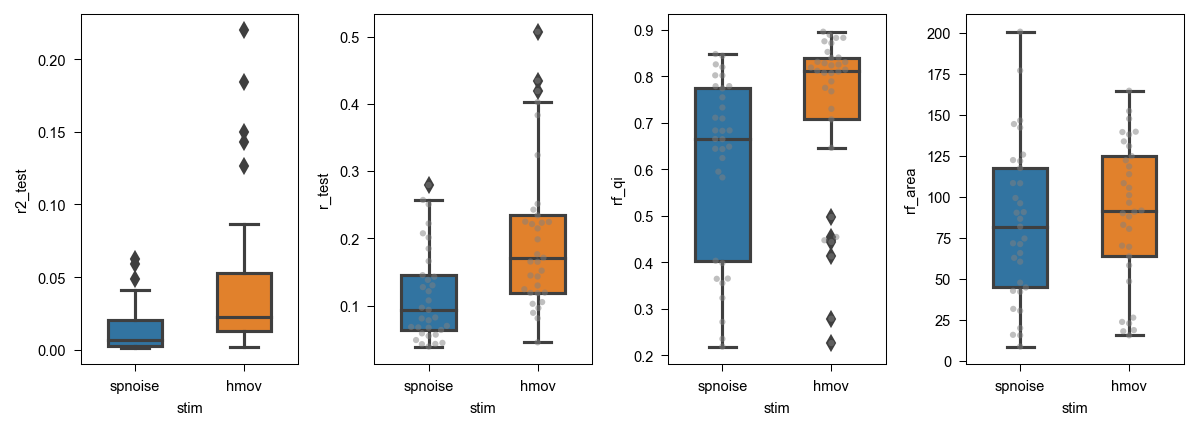

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=cm2inch((20,7)), dpi=150, constrained_layout=True)

sns.boxplot(data=df, x='stim', y='r2_test', width=0.5, ax=axs[0])
sns.boxplot(data=df, x='stim', y='r_test', width=0.5, ax=axs[1])
sns.swarmplot(data=df, x='stim', y='r_test', color='grey', edgecolor='gray', alpha=0.5, size=3, ax=axs[1])
# sns.kdeplot(data=df, y='stim', hue='r_test', ax=axs)
sns.boxplot(data=df, x='stim', y='rf_qi', width=0.5, ax=axs[2])
sns.swarmplot(data=df, x='stim', y='rf_qi', color='grey', edgecolor='gray', alpha=0.5, size=3, ax=axs[2])
sns.boxplot(data=df, x='stim', y='rf_area', width=0.5, ax=axs[3])
sns.swarmplot(data=df, x='stim', y='rf_area', color='grey', edgecolor='gray', alpha=0.5, size=3, ax=axs[3])
# sns.boxplot(data=df, x='stim', y='mean_stim_fr', width=0.5, ax=axs[3])
# # sns.swarmplot(data=df, x='stim', y='rf_area', color='grey', edgecolor='gray', alpha=0.5, size=3, ax=axs[2])


print(df[['stim', 'r_test', 'rf_qi', 'rf_area']].groupby('stim').agg(['mean', 'std', 'count']))

### Scatter plot 

In [18]:
## Get hmov and spnoise models and reduce to best model each
# Criteria
rf_qi_crit = 0.2
# r_test_crit = 0.1
r2_test_crit_sn = 0.001  # sparse noise
r2_test_crit_hm = 0.001  # hmov

## Get matched hmov and spnoise models and reduce to best model each
# Restrict to hmov models with stimulus-only and spatial resolution to match spnoise model
keys = (SplineLNP.Eval() * SplineLNPParams() & 'spl_stim LIKE "hmov"' 
        & {'spl_pshf': 'False', 'spl_opto': 'False', 'spl_run': 'False', 'spl_eye': 'False'}
        & {'spl_spat_df': 13} & 'spl_spat_scaling LIKE 0.0495'  # due to SQL float imprecision
        & f'spl_rf_qi > {rf_qi_crit}' 
#         & f'spl_r_test > {r_test_crit}'
        & f'spl_r2_test > {r2_test_crit_hm}'
       ).fetch(dj.key, as_dict=True)
df1 = get_best_model(keys, crit='spl_r_test', key_only=False, format='df')  # picks best model
print('hmov df length:', len(df1))

# Restrict to spnoise models with stimulus-only and spatial resolution to match hmov model
keys = (SplineLNP.Eval() * SplineLNPParams() & 'spl_stim LIKE "spnoise"' 
        & {'spl_pshf': 'False', 'spl_opto': 'False', 'spl_run': 'False', 'spl_eye': 'False'}
        & {'spl_spat_df': 12, 'spl_spat_scaling': 0}
        & f'spl_rf_qi > {rf_qi_crit}' 
#         & f'spl_r_test > {r_test_crit}'
        & f'spl_r2_test > {r2_test_crit_sn}'
       ).fetch(dj.key, as_dict=True)
df2 = get_best_model(keys, crit='spl_r_test', key_only=False, format='df')  # picks best model
print('spnoise df length:', len(df2))


# Merge on unit to reduce to units with both models
df = df1.merge(df2, on=['m','s','u'], how='inner')
df.columns = df.columns.str.replace(r'spl_', '')  # rmv prefixes from column names (better than lstrip)
print('merged df length:', len(df))
# df

hmov df length: 91
spnoise df length: 68
merged df length: 33


Hollywood movie vs. sparse noise models per unit 
(best model per stimulus; only stRF filter; $RF QI > 0.2$; $r^2 > 0.001$)


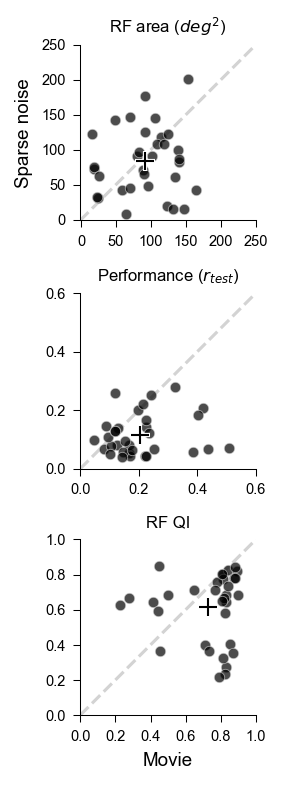

In [19]:
# Create figure
fig, axs = plt.subplots(3,1, figsize=cm2inch((5.6, 13.0)), sharex=False, sharey=False, constrained_layout=True) #dpi=250, 

# Set parameters
facecolor = 'k'
edgecolor = 'lightgrey'
alpha = 0.7
markersize = 25

# Scatter plots
sns.scatterplot(data=df, x='rf_area_x', y='rf_area_y', facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, s=markersize, ax=axs[0])#, hue='m')
sns.scatterplot(data=df, x='r_test_x', y='r_test_y', facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, s=markersize, ax=axs[1])#, hue='m')#, hue_norm=(-0.15,0.15)), hue='omi_stim', palette='RdBu', style='m_genotype',
sns.scatterplot(data=df, x='rf_qi_x', y='rf_qi_y', facecolor=facecolor, edgecolor=edgecolor, alpha=alpha, s=markersize, ax=axs[2])
# sns.scatterplot(data=df, x='rf_val_x', y='rf_val_y', ax=axs[2])#, hue='m')
# sns.scatterplot(data=df, x='r2_test_x', y='r2_test_y', ax=axs[0])#, hue='m')#, hue_norm=(-0.15,0.15)), hue='omi_stim', palette='RdBu', style='m_genotype',

# Legend
# axs[0].legend().set_visible(False)
# axs[1].legend().set_visible(False)
# axs[2].legend().set_visible(False)
# axs[3].legend().set_visible(False)

# Mean markers
axs[0].plot(df['rf_area_x'].mean(), df['rf_area_y'].mean(), '+', color='w', markersize=10, markeredgewidth=2)
axs[0].plot(df['rf_area_x'].mean(), df['rf_area_y'].mean(), '+', color='k', markersize=9, markeredgewidth=1)  # simulate black core w white edge
axs[1].plot(df['r_test_x'].mean(), df['r_test_y'].mean(), '+', color='w', markersize=10, markeredgewidth=2)
axs[1].plot(df['r_test_x'].mean(), df['r_test_y'].mean(), '+', color='k', markersize=9, markeredgewidth=1)
axs[2].plot(df['rf_qi_x'].mean(), df['rf_qi_y'].mean(), '+', color='w', markersize=10, markeredgewidth=2)
axs[2].plot(df['rf_qi_x'].mean(), df['rf_qi_y'].mean(), '+', color='k', markersize=9, markeredgewidth=1)
# axs[2].plot(df['rf_val_x'].mean(), df['rf_val_y'].mean(), 'k+', markersize=10, markeredgewidth=2)
# axs[0].plot(df['r2_test_x'].mean(), df['r2_test_y'].mean(), 'k+', markersize=10, markeredgewidth=2)

# Axis titles and labels
axs[0].set_title('RF area ($deg^2$)')
axs[1].set_title('Performance ($r_{test}$)')
axs[2].set_title('RF QI')
# axs[2].set_title('$RF polarity$')
# axs[0].set_title('$r^2_{test}$')

axs[-1].set_xlabel('Movie', fontsize=9)#, ha='left')#, x=1.0)
axs[0].set_xlabel('')
axs[1].set_xlabel('')
# axs[3].set_xlabel('')

axs[0].set_ylabel('Sparse noise', fontsize=9)
axs[1].set_ylabel('')
axs[2].set_ylabel('')
# axs[3].set_ylabel('')

txt = f'Hollywood movie vs. sparse noise models per unit \n(best model per stimulus; only stRF filter; $RF QI > {rf_qi_crit}$; $r^2 > {r2_test_crit_sn}$)'
print(txt)
# fig.suptitle(txt)

############# Make x- & y-axis square, with same aspect ratio and same ticks #############
# This seems weirdly hard, and it is unclear why this solution works.
# Putting it into a function does not work

# Make aspect ratio equal (this does not auto-make the axes square (only if lims manually equalized), and ticklabels are diff)
for ax in axs: ax.set_aspect('equal', adjustable='box')

# Make axes square (same effect here as set_aspect:equal)
# for ax in axs: ax.axis('square')  # it matters where in the code this is placed!
# axs[0].axis('square')  # it matters a lot where in the code this is placed!
# axs[0].axis('equal')  # same as set_aspect, not square

# Set axis limits (this does not seem necessary after setting ticks)
# Using get_xlim() is more flexible than setting limits manually but we need ensure to encapsulate whole range of x and y
for ax in axs: 
    ax.set_xlim(np.min([*ax.get_xlim(), *ax.get_ylim()]), np.max([*ax.get_xlim(), *ax.get_ylim()]))
    ax.set_ylim(np.min([*ax.get_xlim(), *ax.get_ylim()]), np.max([*ax.get_xlim(), *ax.get_ylim()]))
# axs[0].set_ylim(np.min([*axs[0].get_xlim(), *axs[0].get_ylim()]), np.max([*axs[0].get_xlim(), *axs[0].get_ylim()]))

# Set x and y ticks
# x_ticks seems to return a different set of ticks from the one actually displayed unless explicitly set (e.g. x did not have neg values in first place)
# Unclear why this works to produce desired effect
for ax in axs:  # use xticks bc larger range for hmov
    ax.set_yticks(ax.get_xticks()[ax.get_xticks() >= 0])  # manually excluding x-ticks below 0
    ax.set_xticks(ax.get_xticks()[ax.get_xticks() >= 0])  # manually excluding x-ticks below 0
axs[1].set_yticks(axs[1].get_xticks())
axs[1].set_xticks(axs[1].get_xticks())


# Draw diagonal lines (only makes sense after everything else has been brought into same range)
for ax in axs: ax.plot([0, 1], [0, 1], color='lightgrey', linestyle='--', transform=ax.transAxes, zorder=-1)
# for ax in axs: ax.plot([0, 40], [0, 40], color='grey', linestyle='--', zorder=-1)  # explicit limits

# Despine axes
# for ax in axs: adjust_spines(ax, spines=['bottom', 'left'], spine_pos=2)  # has issues w uneven spines
sns.despine()

# Save figure
plt.savefig('./figs/hmov_vs_spnoise_population_scatter.pdf')

### Stats

In [7]:
df[['r2_test_x', 'r2_test_y', 'r_test_x', 'r_test_y', 'rf_qi_x', 'rf_qi_y', 'rf_area_x', 'rf_area_y']].describe()
# df.iloc[:, 4::].describe()

r2_test_x  r2_test_y   r_test_x   r_test_y    rf_qi_x    rf_qi_y   rf_area_x   rf_area_y
count  33.000000  33.000000  33.000000  33.000000  33.000000  33.000000   33.000000   33.000000
mean    0.047272   0.015107   0.204637   0.116228   0.727998   0.613369   90.780355   83.777776
std     0.055230   0.016979   0.114196   0.069561   0.188183   0.194162   43.751624   47.957946
min     0.002152   0.001147   0.045194   0.038999   0.226221   0.218859   15.415900    8.599310
25%     0.013279   0.002364   0.119264   0.063628   0.707681   0.403442   63.665500   44.657800
50%     0.022601   0.006686   0.171118   0.093540   0.812102   0.665432   91.594300   81.791200
75%     0.053129   0.020349   0.234189   0.145183   0.839981   0.774406  124.828000  117.556000
max     0.220024   0.062708   0.507433   0.279325   0.896302   0.848249  164.770000  200.813000

In [10]:
print('r2 test performance:', stats.wilcoxon(df['r2_test_x'], df['r2_test_y']))
print('r test performance:', stats.wilcoxon(df['r_test_x'], df['r_test_y']))
print('RF QI:', stats.wilcoxon(df['rf_qi_x'], df['rf_qi_y']))
print('RF area:', stats.wilcoxon(df['rf_area_x'], df['rf_area_y']))

r2 test performance: WilcoxonResult(statistic=87.0, pvalue=0.0005453641436933228)
r test performance: WilcoxonResult(statistic=79.0, pvalue=0.00031776764072712137)
RF QI: WilcoxonResult(statistic=141.0, pvalue=0.01268251271857492)
RF area: WilcoxonResult(statistic=246.0, pvalue=0.5376040906609355)


## Plot paired movie vs sparse noise models, STAs and stimTAs

Unit 1/33
hmov key = {'m': 'Ntsr1Cre_2019_0007', 's': 6, 'e': 9, 'u': 7, 'spl_paramset': 700}
  hmov RF pos (x,y): (12, 8)
  hmov RF QI: 0.497613
  hmov RF area: 58.1599
spnoise key = {'m': 'Ntsr1Cre_2019_0007', 's': 6, 'e': 1, 'u': 7, 'spl_paramset': 4}
  spnoise RF pos (x,y): (8, 8)
  spnoise RF QI: 0.683044
  spnoise RF area: 42.5949


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


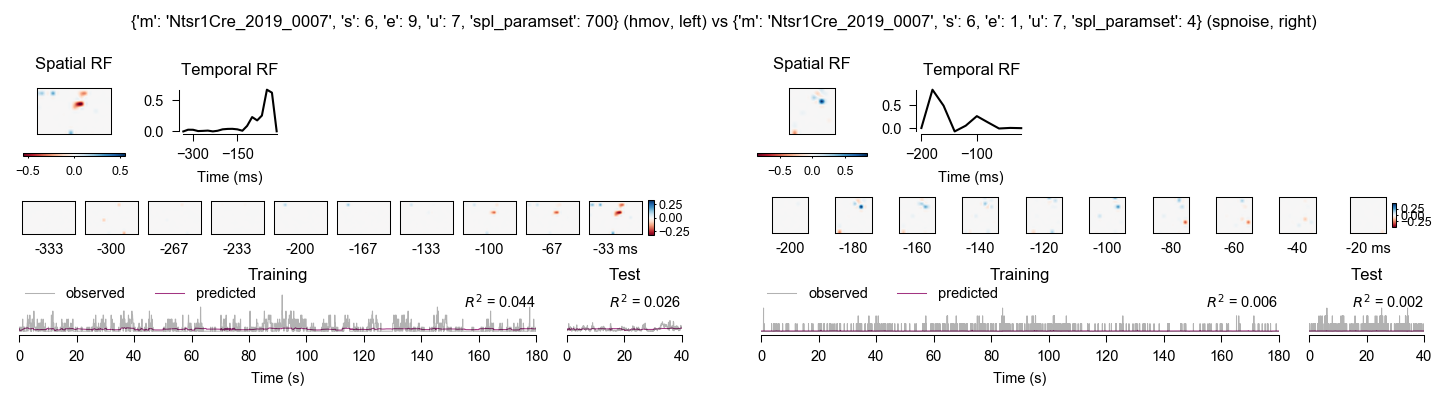

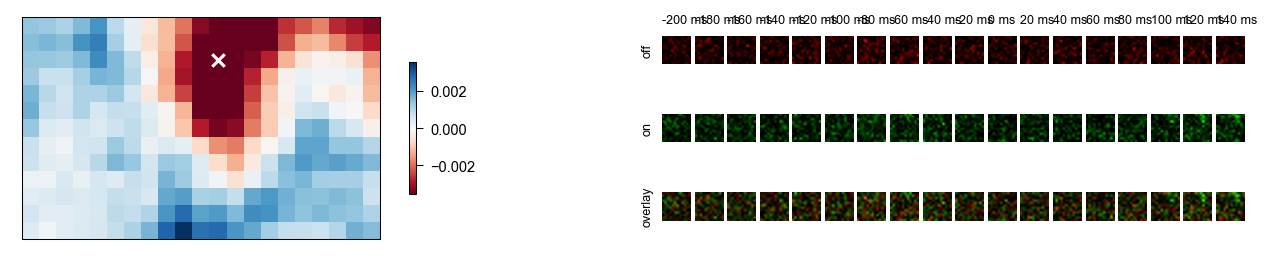

Unit 2/33
hmov key = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 25, 'spl_paramset': 796}
  hmov RF pos (x,y): (10, 3)
  hmov RF QI: 0.831591
  hmov RF area: 147.665
spnoise key = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 25, 'spl_paramset': 3}
  spnoise RF pos (x,y): (5, 3)
  spnoise RF QI: 0.271769
  spnoise RF area: 15.4397


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


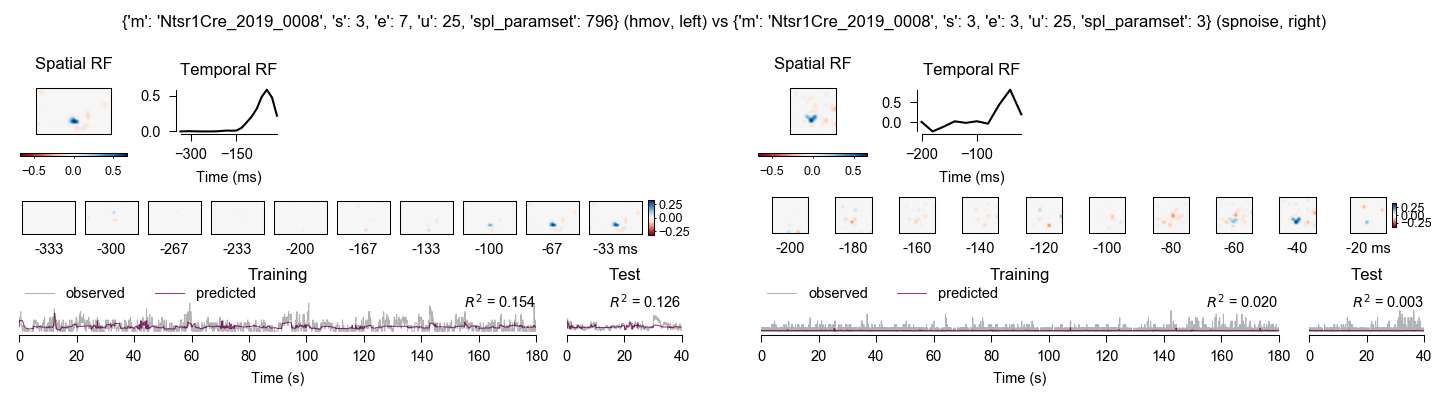

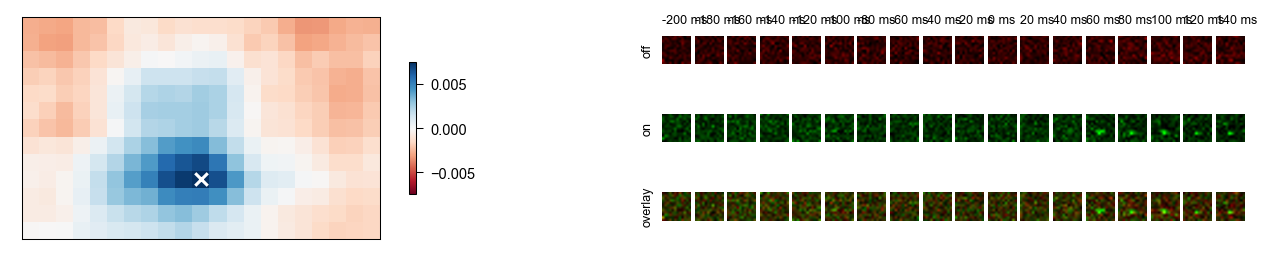

Unit 3/33
hmov key = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 34, 'spl_paramset': 700}
  hmov RF pos (x,y): (12, 2)
  hmov RF QI: 0.814625
  hmov RF area: 80.4311
spnoise key = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 3, 'u': 34, 'spl_paramset': 3}
  spnoise RF pos (x,y): (8, 2)
  spnoise RF QI: 0.802406
  spnoise RF area: 90.2928


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


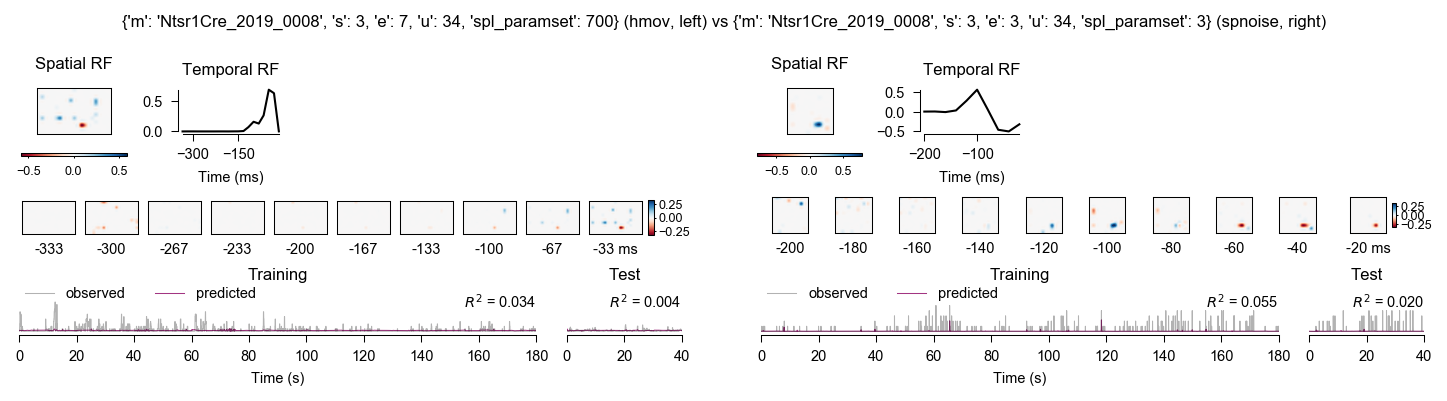

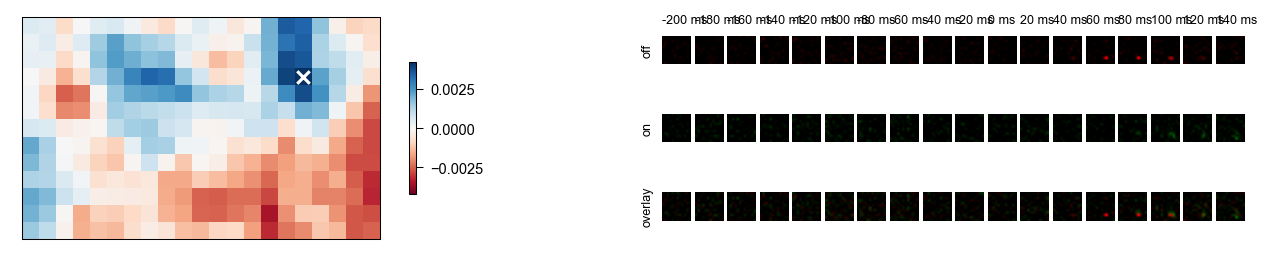

Unit 4/33
hmov key = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 19, 'spl_paramset': 796}
  hmov RF pos (x,y): (10, 7)
  hmov RF QI: 0.839981
  hmov RF area: 133.844
spnoise key = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 3, 'u': 19, 'spl_paramset': 4}
  spnoise RF pos (x,y): (5, 7)
  spnoise RF QI: 0.825978
  spnoise RF area: 60.3906


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


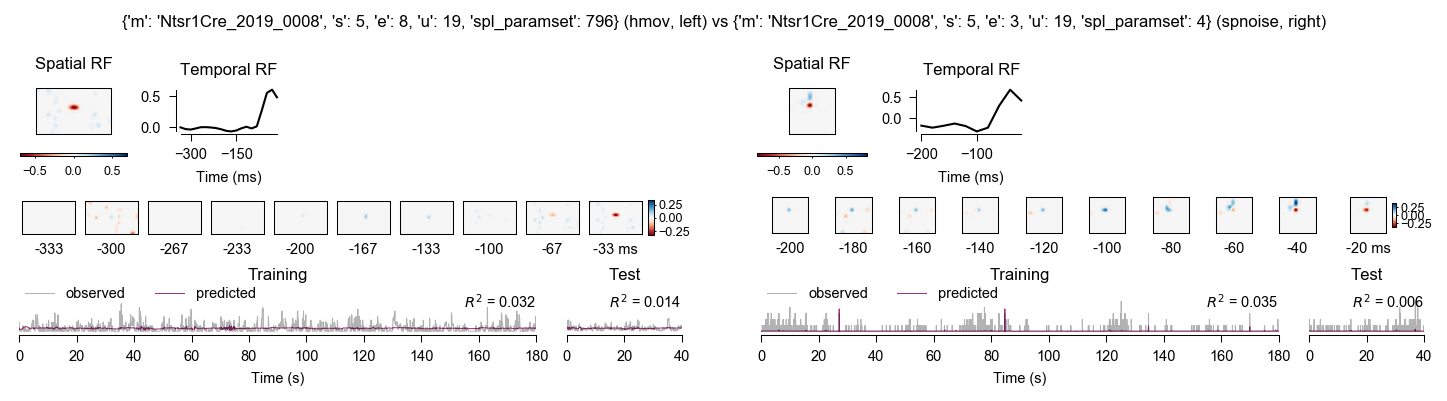

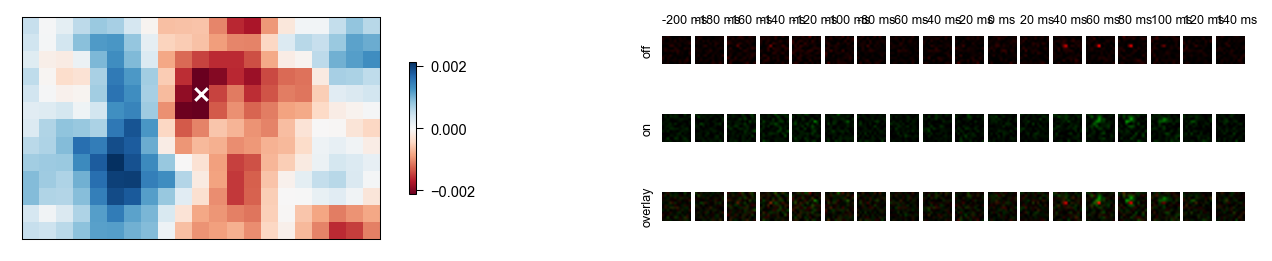

Unit 5/33
hmov key = {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 30, 'spl_paramset': 700}
  hmov RF pos (x,y): (7, 7)
  hmov RF QI: 0.889586
  hmov RF area: 82.8853
spnoise key = {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 30, 'spl_paramset': 4}
  spnoise RF pos (x,y): (3, 6)
  spnoise RF QI: 0.820052
  spnoise RF area: 96.0582


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


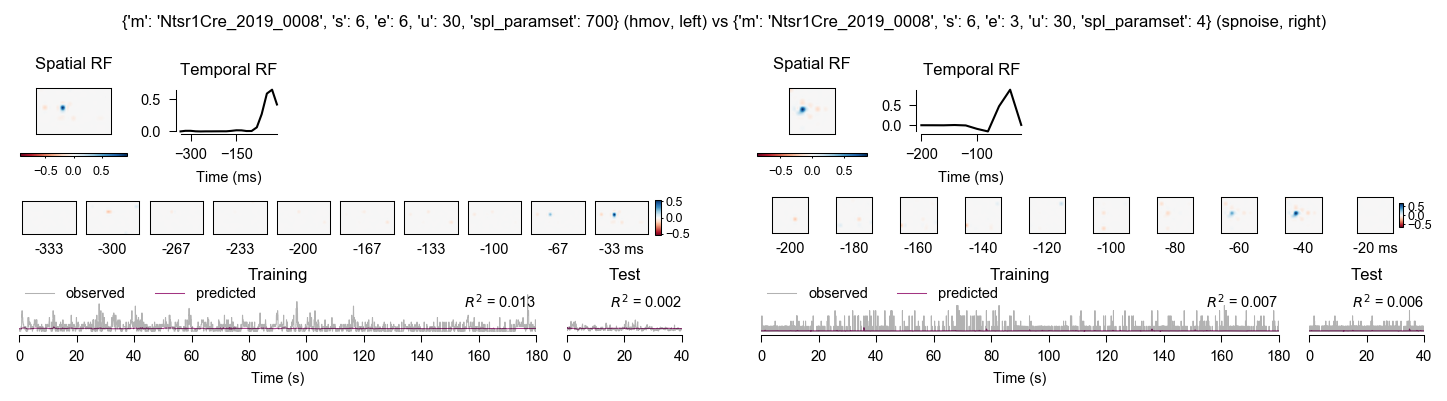

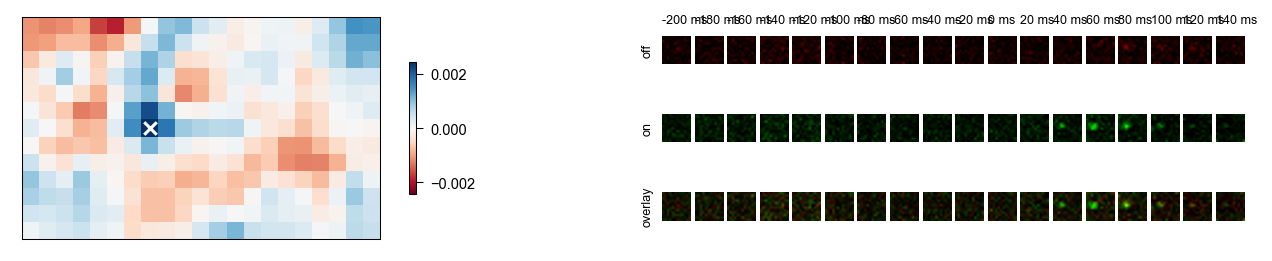

Unit 6/33
hmov key = {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 40, 'spl_paramset': 748}
  hmov RF pos (x,y): (8, 5)
  hmov RF QI: 0.883153
  hmov RF area: 87.9906
spnoise key = {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 40, 'spl_paramset': 4}
  spnoise RF pos (x,y): (4, 4)
  spnoise RF QI: 0.844142
  spnoise RF area: 71.1398


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


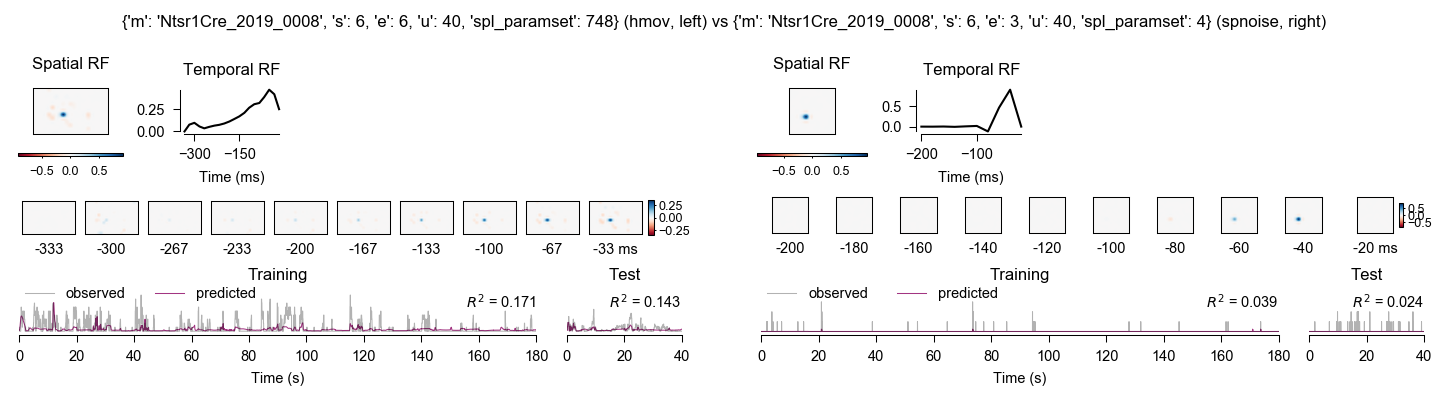

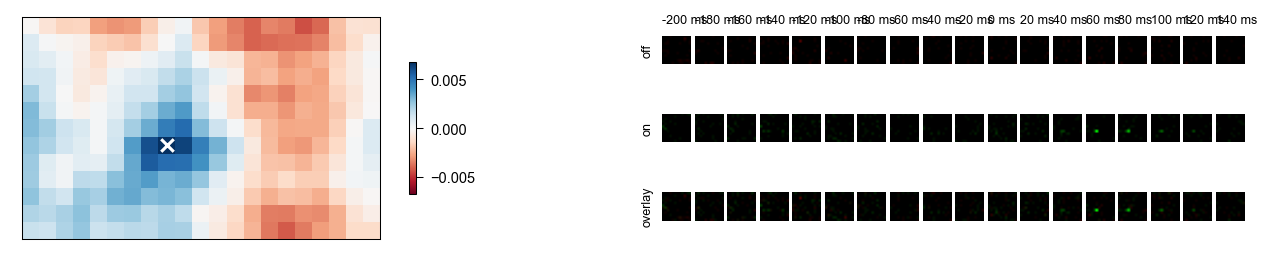

Unit 7/33
hmov key = {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 46, 'spl_paramset': 796}
  hmov RF pos (x,y): (8, 5)
  hmov RF QI: 0.812102
  hmov RF area: 138.042
spnoise key = {'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 3, 'u': 46, 'spl_paramset': 4}
  spnoise RF pos (x,y): (4, 4)
  spnoise RF QI: 0.774406
  spnoise RF area: 99.283


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


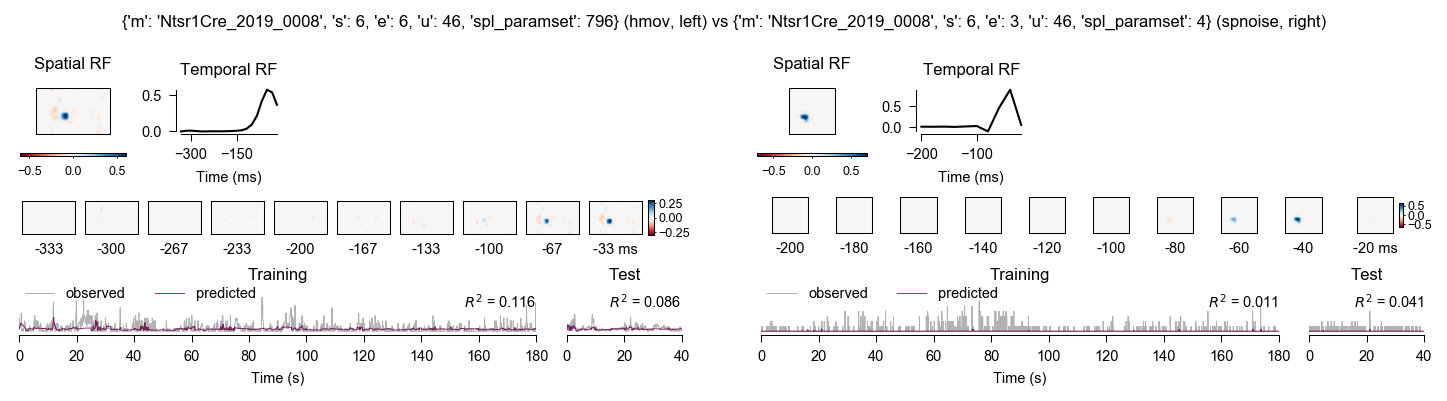

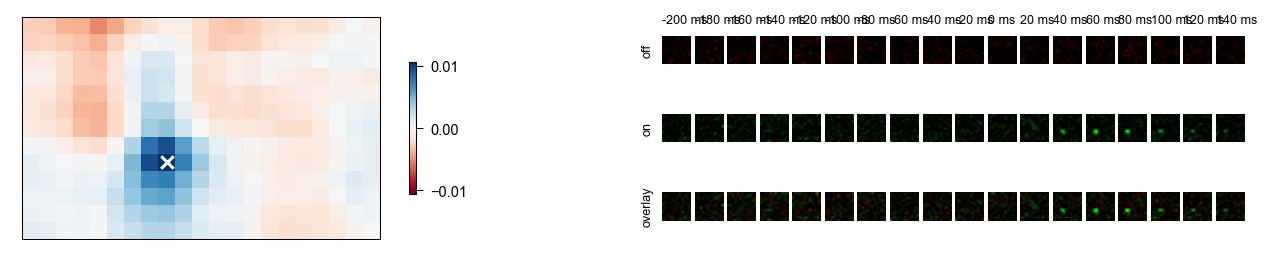

Unit 8/33
hmov key = {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 6, 'spl_paramset': 700}
  hmov RF pos (x,y): (9, 7)
  hmov RF QI: 0.875661
  hmov RF area: 101.004
spnoise key = {'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 3, 'u': 6, 'spl_paramset': 3}
  spnoise RF pos (x,y): (5, 6)
  spnoise RF QI: 0.779182
  spnoise RF area: 90.6836


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


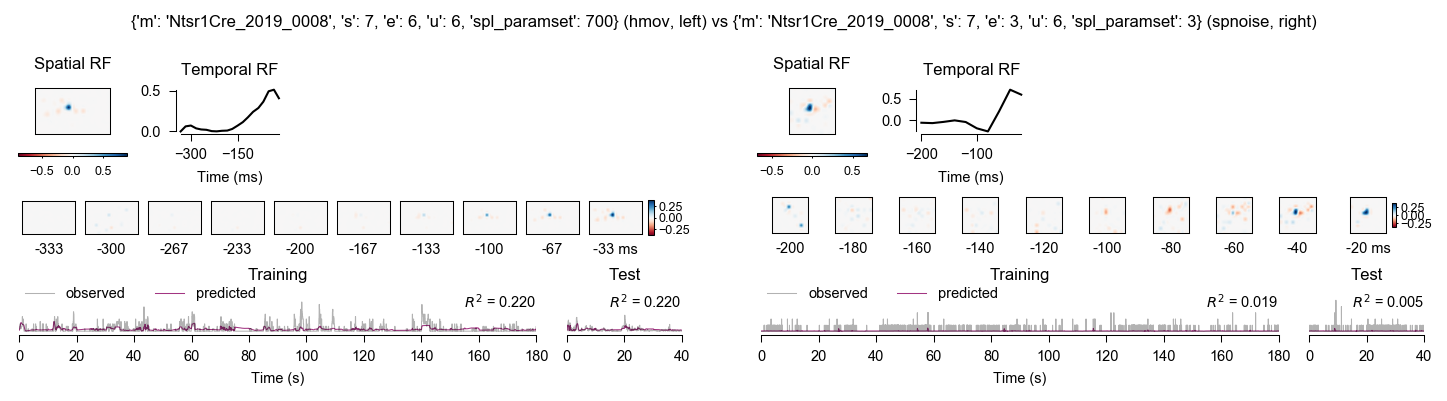

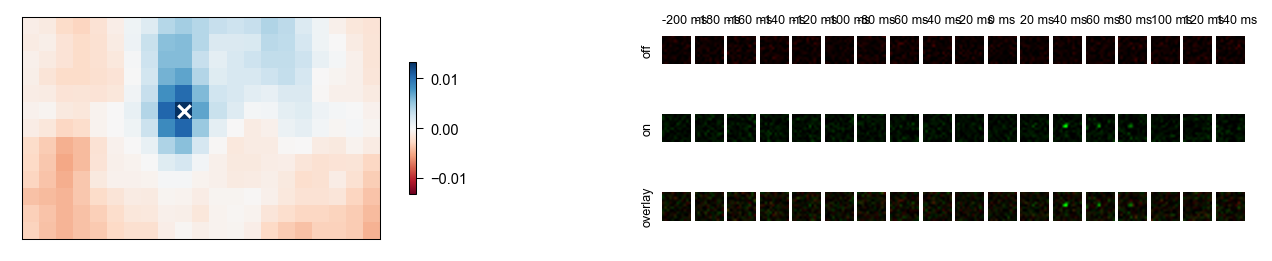

Unit 9/33
hmov key = {'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 6, 'u': 4, 'spl_paramset': 796}
  hmov RF pos (x,y): (9, 6)
  hmov RF QI: 0.810366
  hmov RF area: 164.77
spnoise key = {'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 1, 'u': 4, 'spl_paramset': 4}
  spnoise RF pos (x,y): (2, 7)
  spnoise RF QI: 0.323299
  spnoise RF area: 42.0194


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


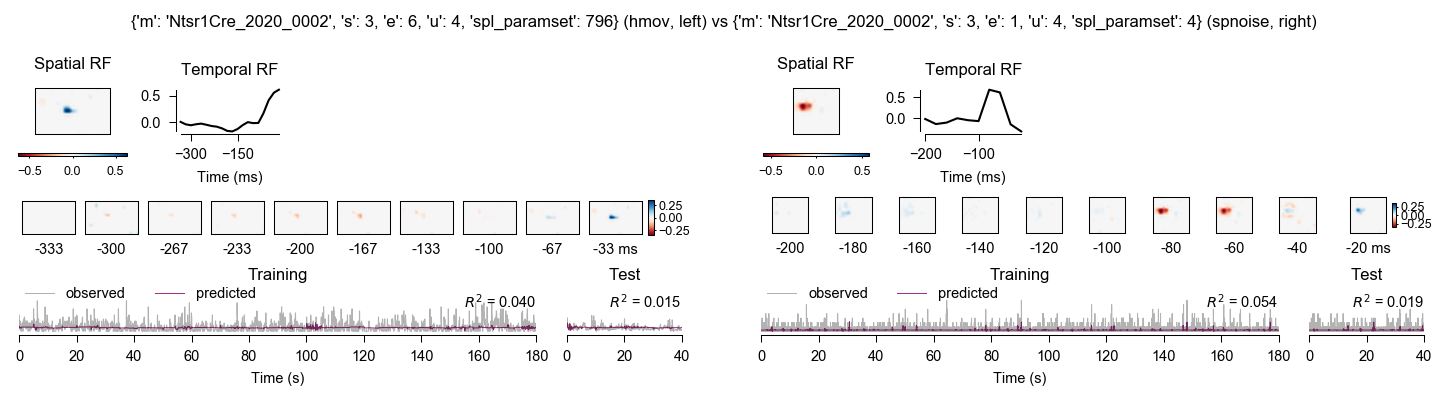

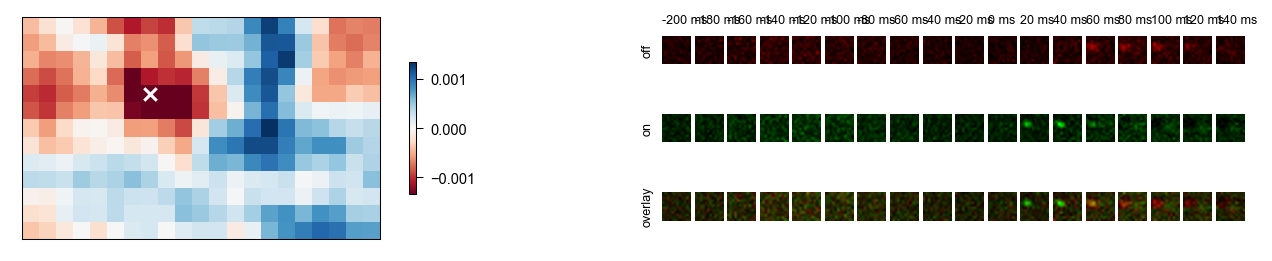

Unit 10/33
hmov key = {'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 6, 'u': 15, 'spl_paramset': 748}
  hmov RF pos (x,y): (9, 4)
  hmov RF QI: 0.831002
  hmov RF area: 113.817
spnoise key = {'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 1, 'u': 15, 'spl_paramset': 3}
  spnoise RF pos (x,y): (3, 4)
  spnoise RF QI: 0.683892
  spnoise RF area: 117.556


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


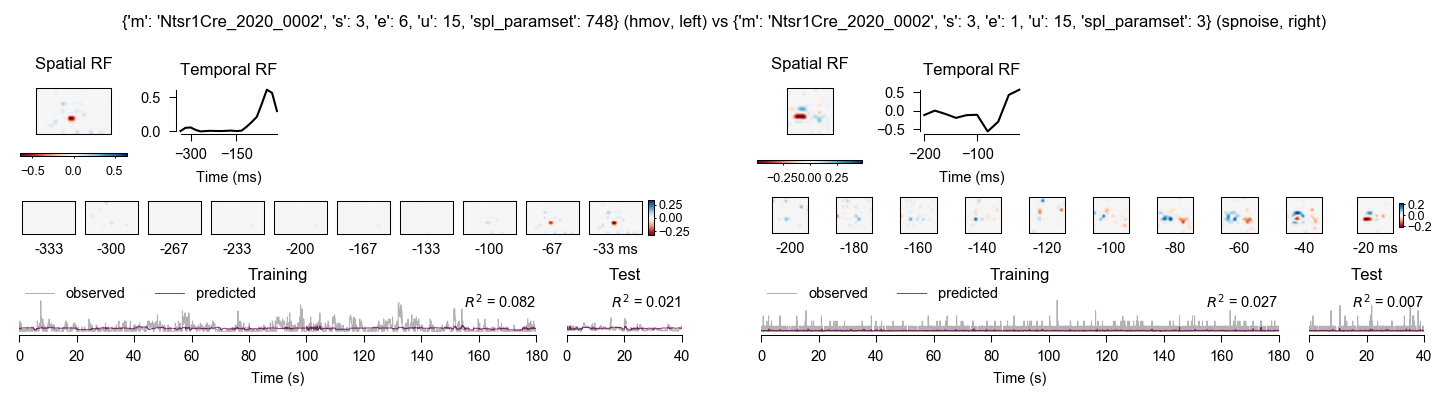

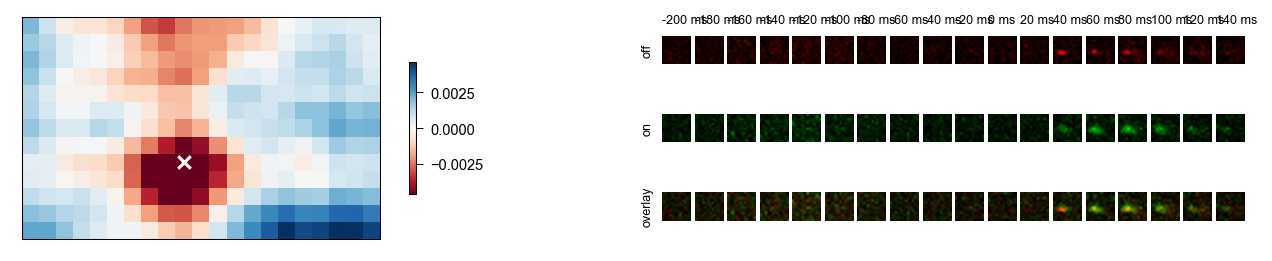

Unit 11/33
hmov key = {'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 6, 'u': 20, 'spl_paramset': 700}
  hmov RF pos (x,y): (11, 2)
  hmov RF QI: 0.828546
  hmov RF area: 96.3992
spnoise key = {'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 1, 'u': 20, 'spl_paramset': 3}
  spnoise RF pos (x,y): (4, 4)
  spnoise RF QI: 0.643744
  spnoise RF area: 47.5894


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


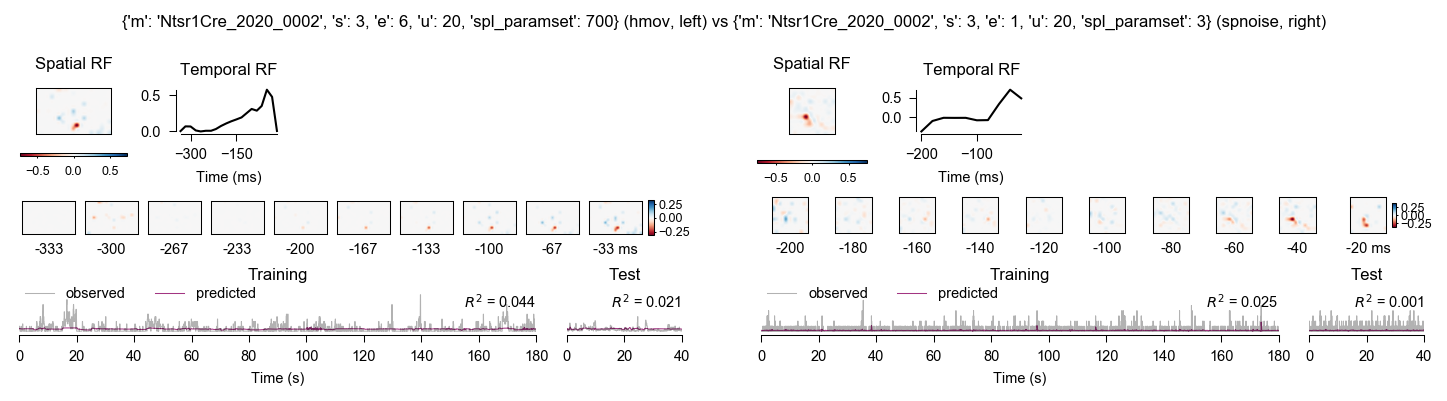

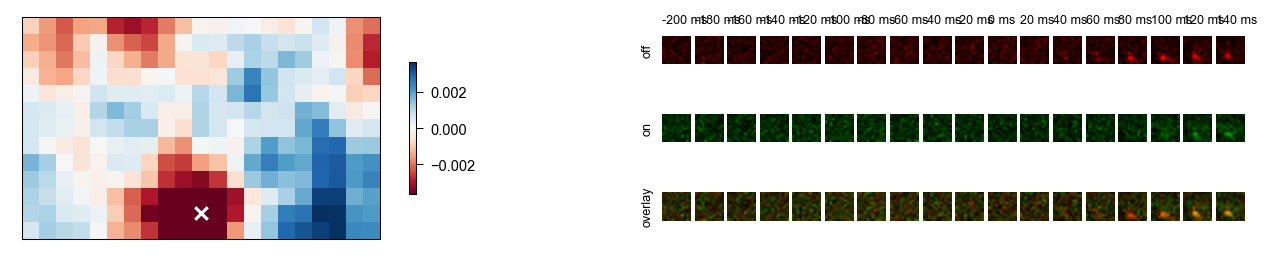

Unit 12/33
hmov key = {'m': 'Ntsr1Cre_2020_0002', 's': 5, 'e': 6, 'u': 14, 'spl_paramset': 700}
  hmov RF pos (x,y): (10, 7)
  hmov RF QI: 0.278811
  hmov RF area: 17.9184
spnoise key = {'m': 'Ntsr1Cre_2020_0002', 's': 5, 'e': 1, 'u': 14, 'spl_paramset': 3}
  spnoise RF pos (x,y): (5, 7)
  spnoise RF QI: 0.665042
  spnoise RF area: 71.6283


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


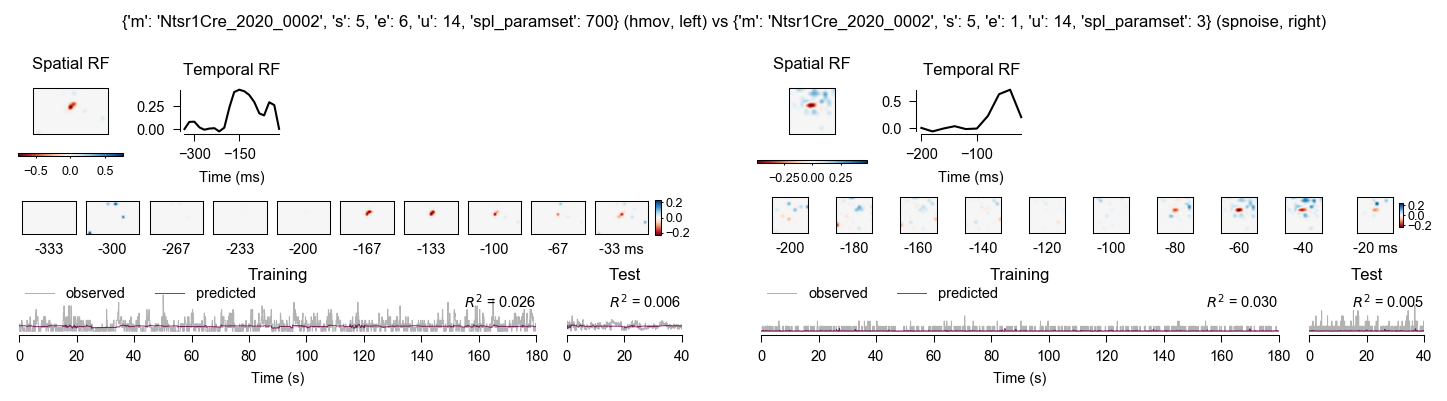

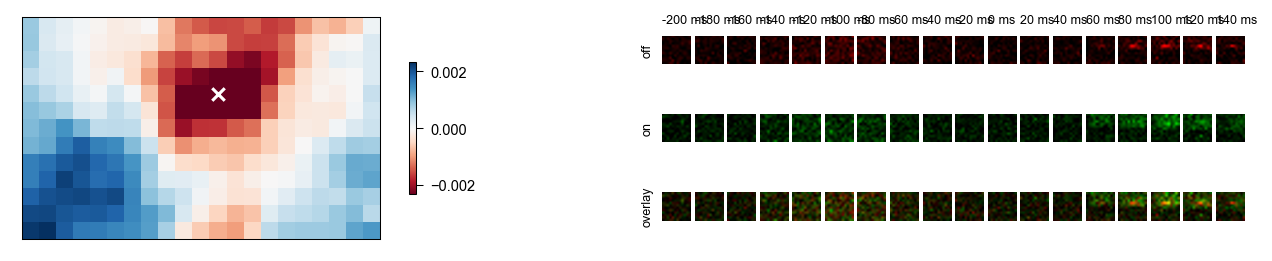

Unit 13/33
hmov key = {'m': 'Ntsr1Cre_2020_0002', 's': 5, 'e': 6, 'u': 39, 'spl_paramset': 700}
  hmov RF pos (x,y): (11, 4)
  hmov RF QI: 0.852768
  hmov RF area: 122.326
spnoise key = {'m': 'Ntsr1Cre_2020_0002', 's': 5, 'e': 1, 'u': 39, 'spl_paramset': 3}
  spnoise RF pos (x,y): (8, 4)
  spnoise RF QI: 0.403442
  spnoise RF area: 19.837


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


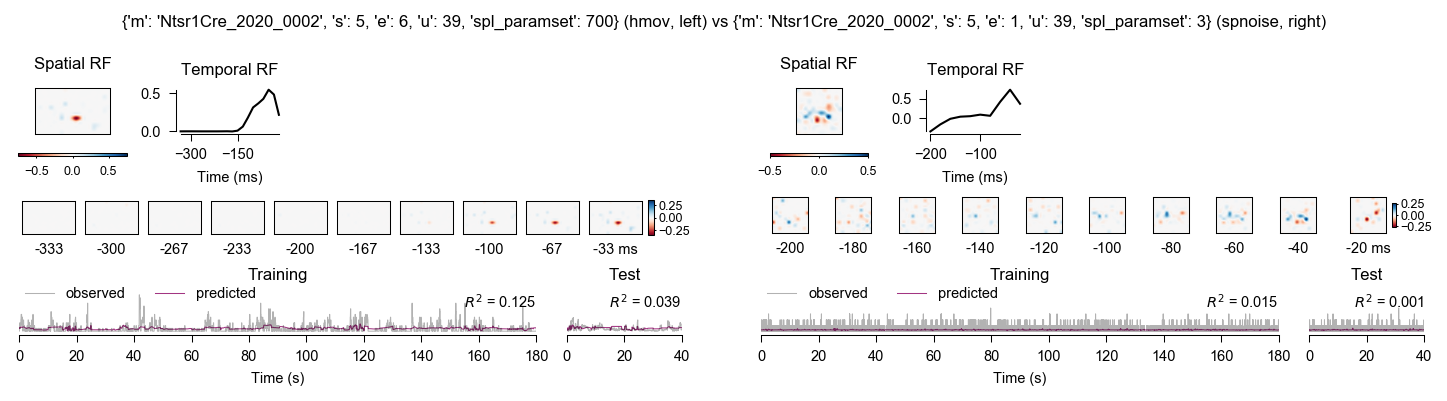

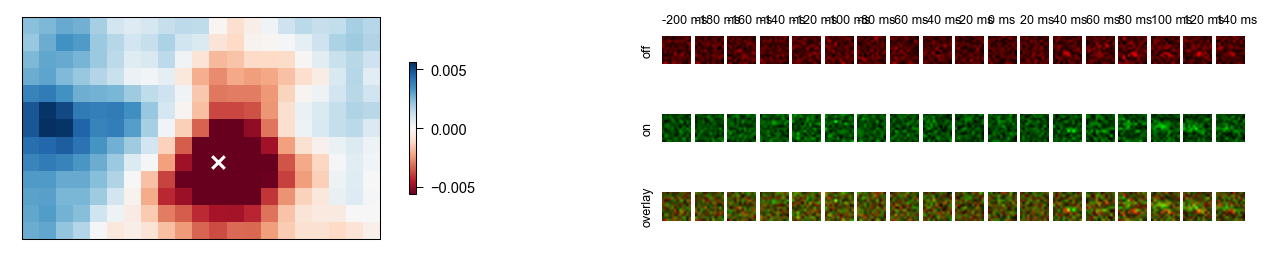

Unit 14/33
hmov key = {'m': 'Ntsr1Cre_2020_0002', 's': 5, 'e': 6, 'u': 56, 'spl_paramset': 700}
  hmov RF pos (x,y): (13, 2)
  hmov RF QI: 0.646399
  hmov RF area: 105.509
spnoise key = {'m': 'Ntsr1Cre_2020_0002', 's': 5, 'e': 1, 'u': 56, 'spl_paramset': 3}
  spnoise RF pos (x,y): (6, 2)
  spnoise RF QI: 0.711256
  spnoise RF area: 144.429


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


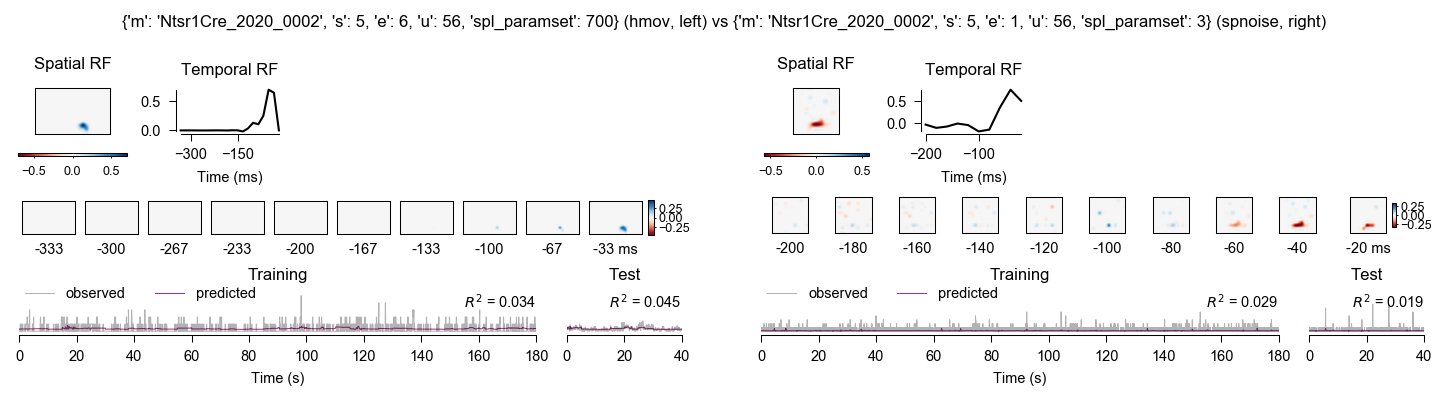

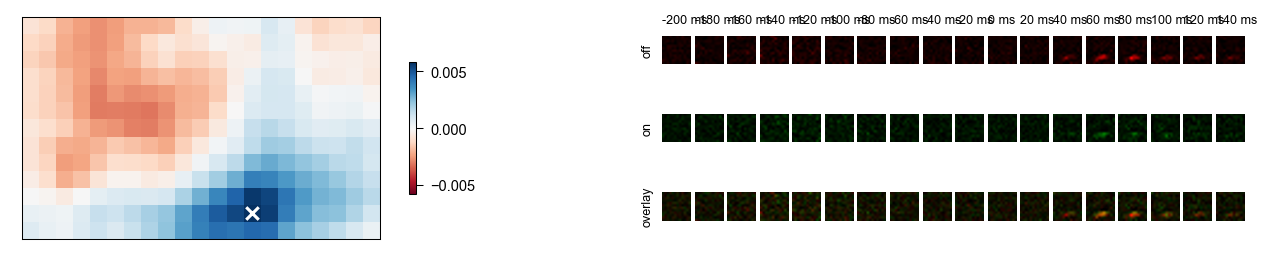

Unit 15/33
hmov key = {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 6, 'u': 9, 'spl_paramset': 700}
  hmov RF pos (x,y): (10, 6)
  hmov RF QI: 0.825705
  hmov RF area: 139.744
spnoise key = {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 1, 'u': 9, 'spl_paramset': 3}
  spnoise RF pos (x,y): (4, 6)
  spnoise RF QI: 0.582666
  spnoise RF area: 81.7912


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


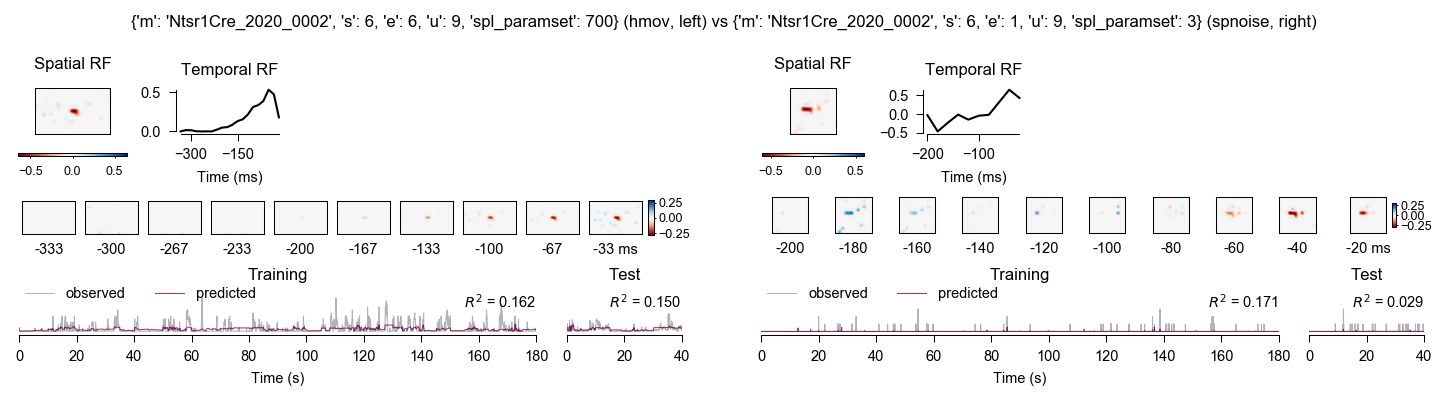

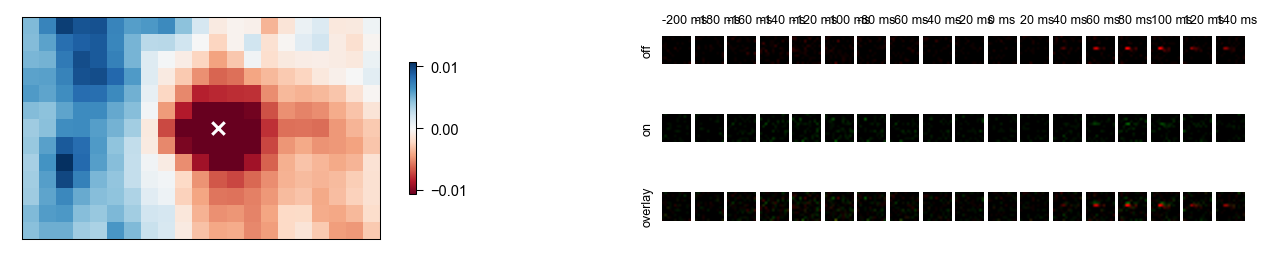

Unit 16/33
hmov key = {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 6, 'u': 15, 'spl_paramset': 700}
  hmov RF pos (x,y): (10, 5)
  hmov RF QI: 0.823846
  hmov RF area: 130.935
spnoise key = {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 1, 'u': 15, 'spl_paramset': 3}
  spnoise RF pos (x,y): (3, 5)
  spnoise RF QI: 0.235389
  spnoise RF area: 15.7328


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


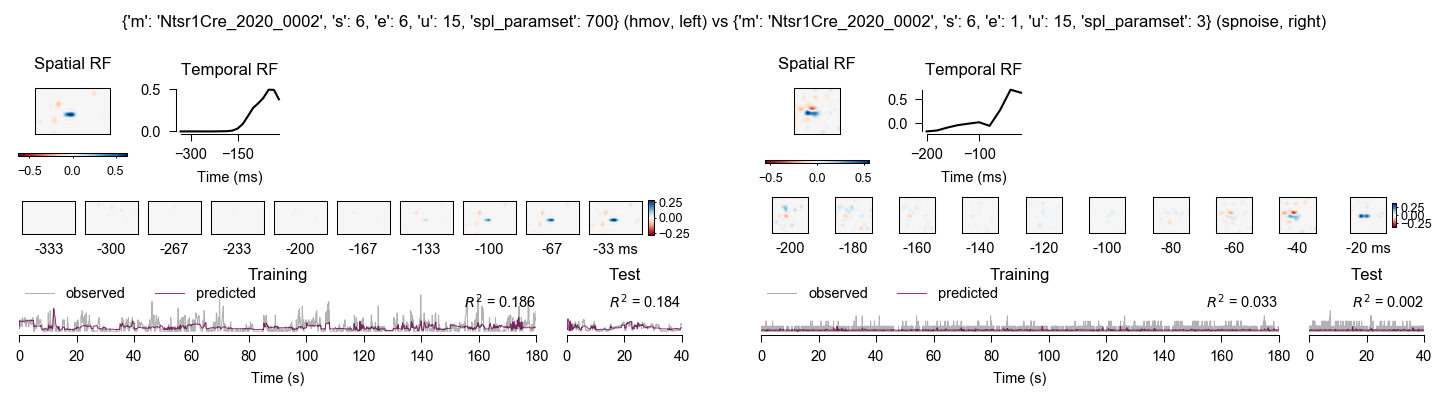

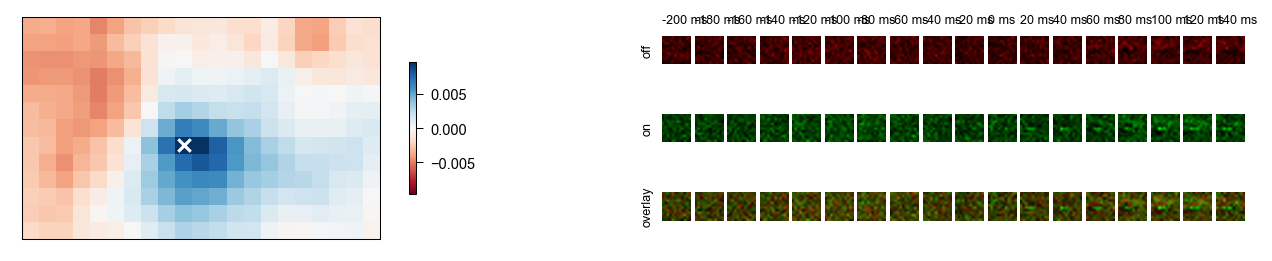

Unit 17/33
hmov key = {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 6, 'u': 17, 'spl_paramset': 796}
  hmov RF pos (x,y): (11, 4)
  hmov RF QI: 0.707681
  hmov RF area: 70.1722
spnoise key = {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 1, 'u': 17, 'spl_paramset': 3}
  spnoise RF pos (x,y): (5, 4)
  spnoise RF QI: 0.398418
  spnoise RF area: 44.6578


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


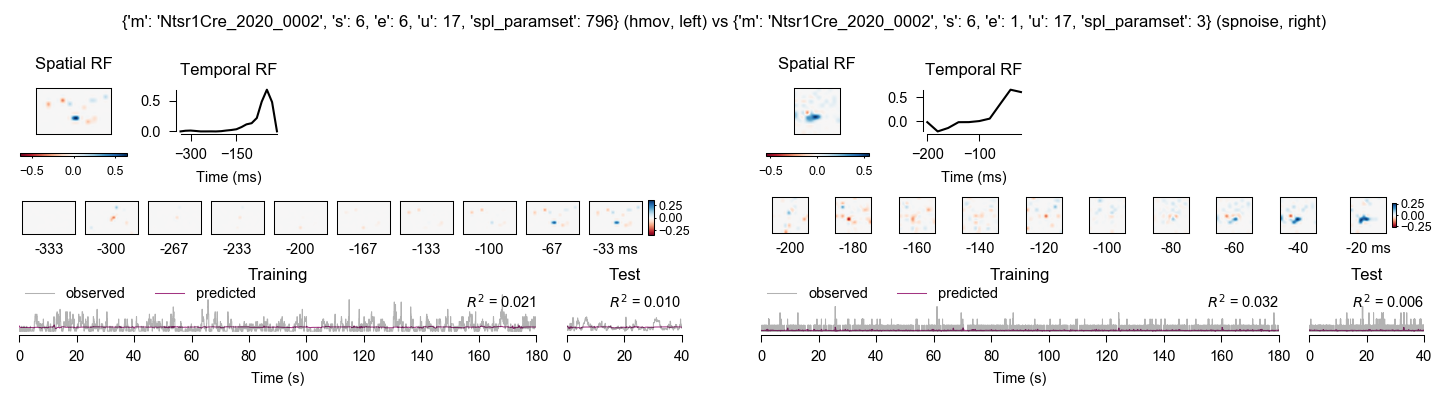

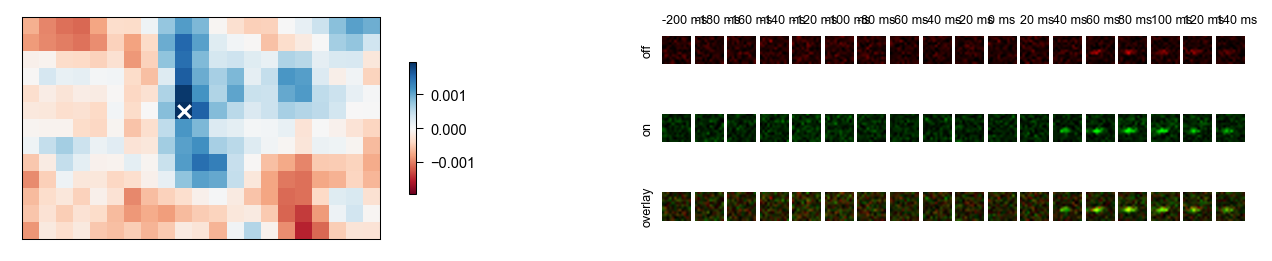

Unit 18/33
hmov key = {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 6, 'u': 18, 'spl_paramset': 700}
  hmov RF pos (x,y): (10, 2)
  hmov RF QI: 0.730254
  hmov RF area: 108.311
spnoise key = {'m': 'Ntsr1Cre_2020_0002', 's': 6, 'e': 1, 'u': 18, 'spl_paramset': 3}
  spnoise RF pos (x,y): (4, 2)
  spnoise RF QI: 0.364539
  spnoise RF area: 108.273


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


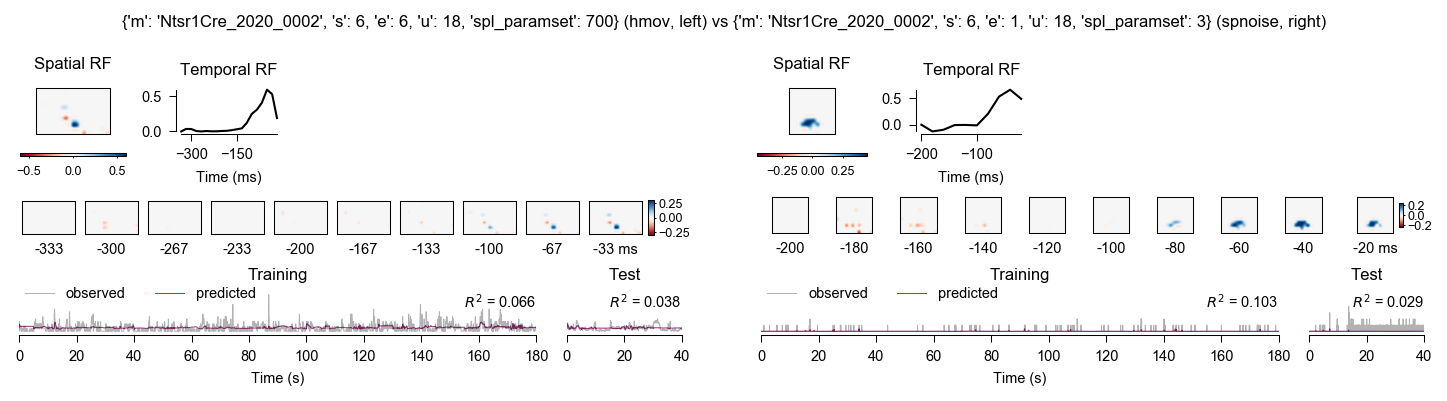

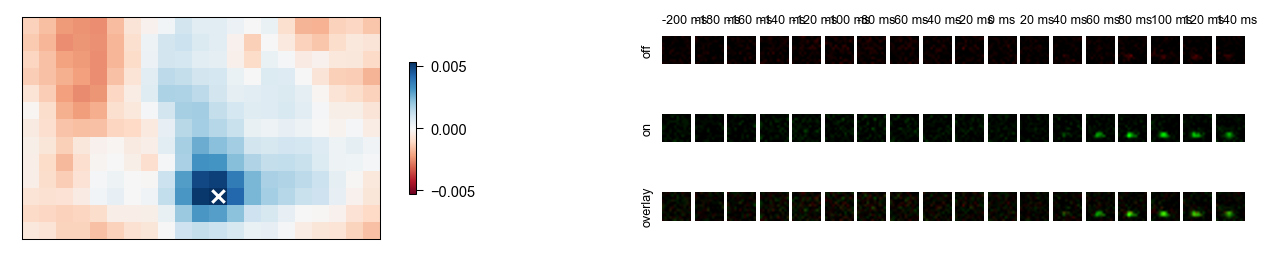

Unit 19/33
hmov key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 17, 'spl_paramset': 700}
  hmov RF pos (x,y): (9, 4)
  hmov RF QI: 0.81906
  hmov RF area: 91.5943
spnoise key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 10, 'u': 17, 'spl_paramset': 3}
  spnoise RF pos (x,y): (6, 4)
  spnoise RF QI: 0.665432
  spnoise RF area: 177.068
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 17}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


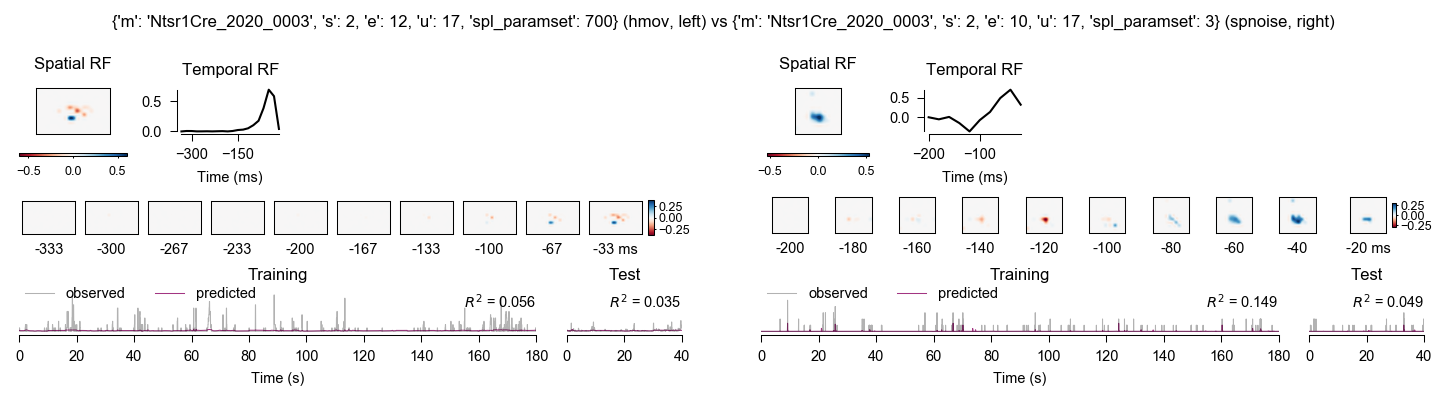

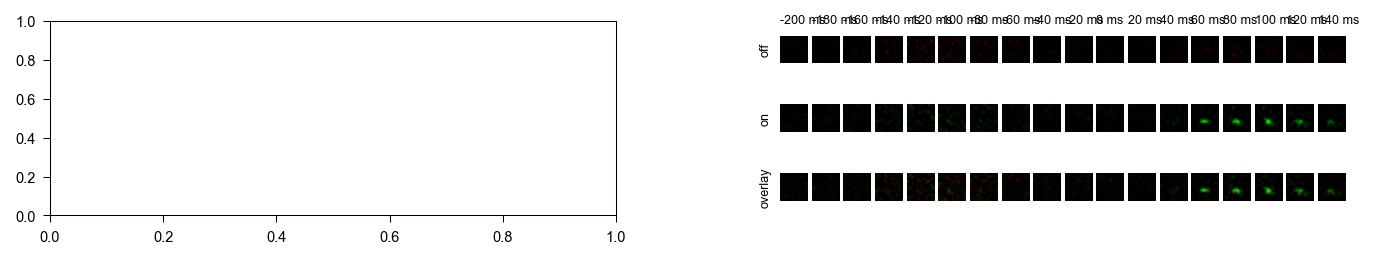

Unit 20/33
hmov key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 29, 'spl_paramset': 700}
  hmov RF pos (x,y): (10, 5)
  hmov RF QI: 0.775544
  hmov RF area: 118.522
spnoise key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 10, 'u': 29, 'spl_paramset': 4}
  spnoise RF pos (x,y): (5, 5)
  spnoise RF QI: 0.755022
  spnoise RF area: 108.371
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 29}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


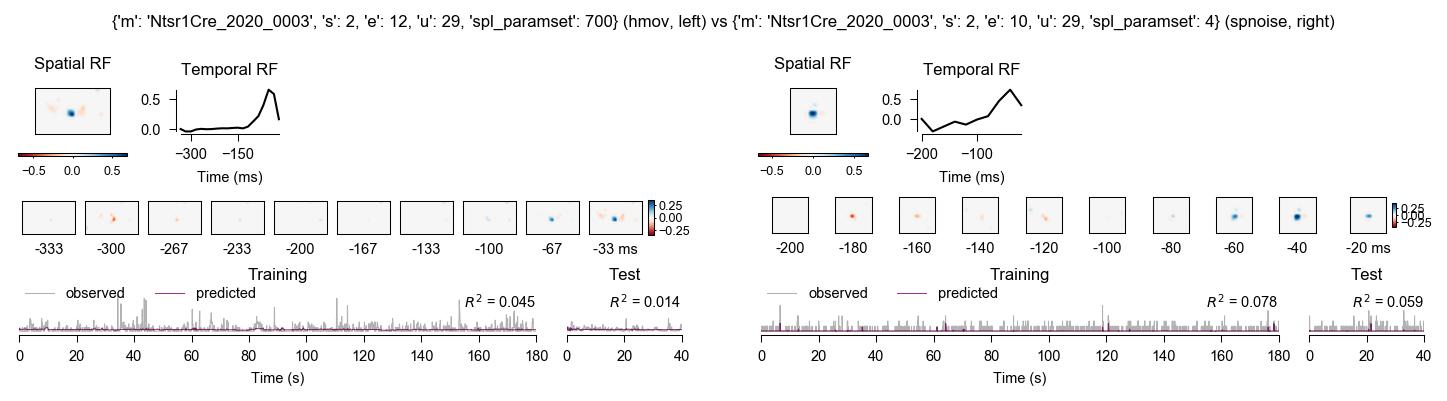

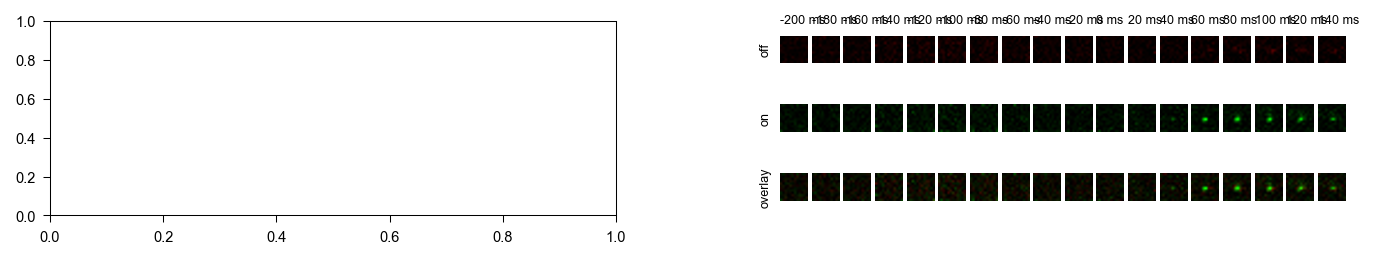

Unit 21/33
hmov key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 34, 'spl_paramset': 700}
  hmov RF pos (x,y): (10, 6)
  hmov RF QI: 0.896302
  hmov RF area: 69.4715
spnoise key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 10, 'u': 34, 'spl_paramset': 4}
  spnoise RF pos (x,y): (2, 7)
  spnoise RF QI: 0.683832
  spnoise RF area: 146.579
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 34}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


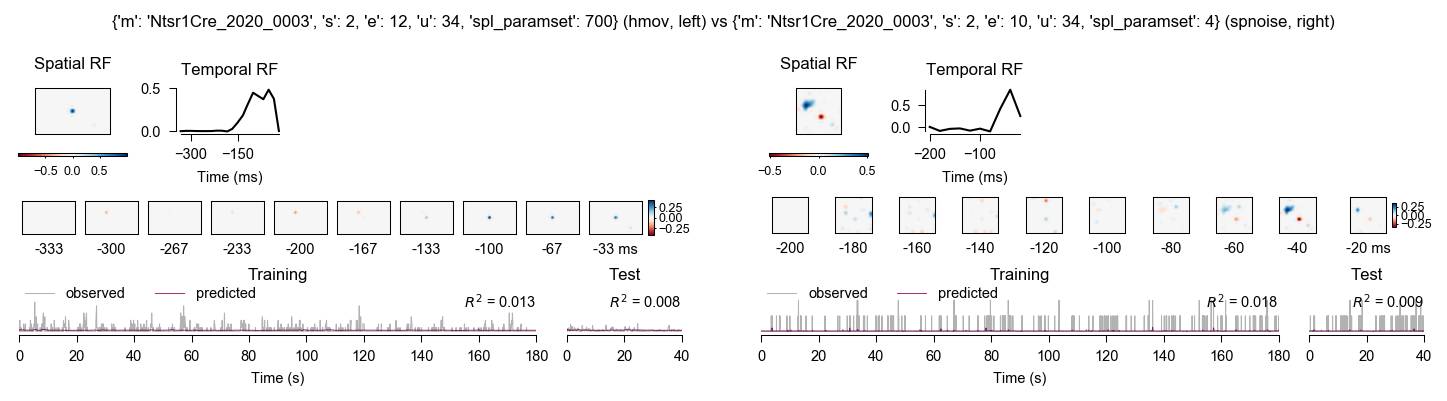

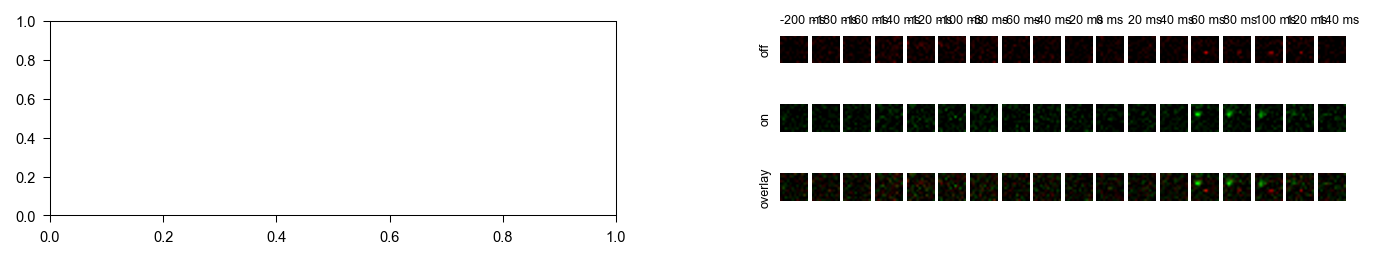

Unit 22/33
hmov key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 35, 'spl_paramset': 700}
  hmov RF pos (x,y): (11, 6)
  hmov RF QI: 0.871768
  hmov RF area: 90.8935
spnoise key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 10, 'u': 35, 'spl_paramset': 4}
  spnoise RF pos (x,y): (5, 4)
  spnoise RF QI: 0.355201
  spnoise RF area: 125.765
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 35}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


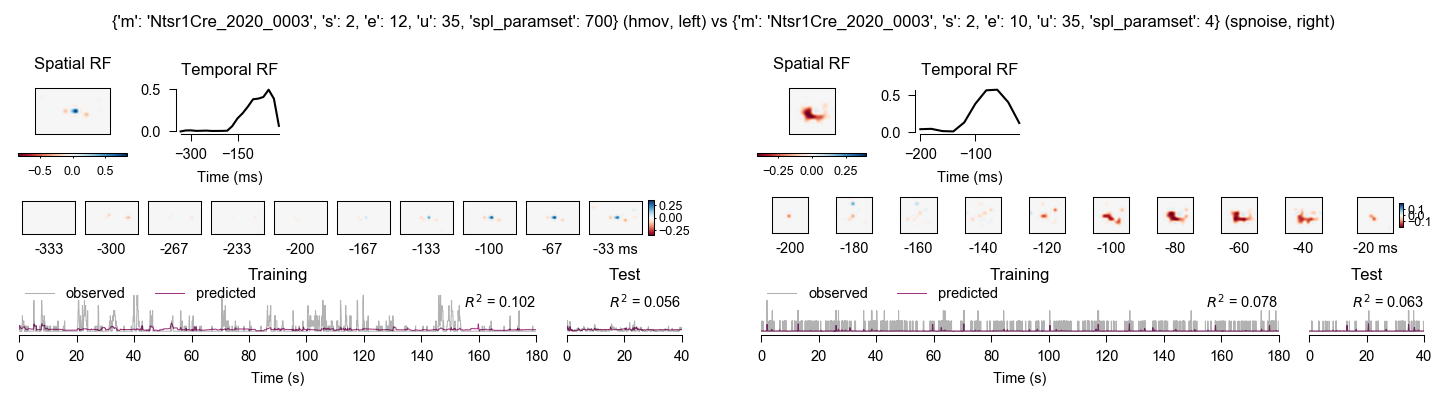

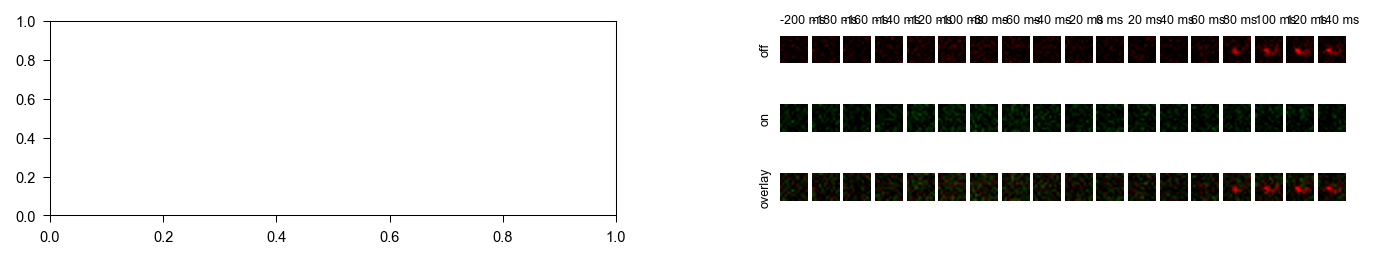

Unit 23/33
hmov key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 37, 'spl_paramset': 700}
  hmov RF pos (x,y): (10, 5)
  hmov RF QI: 0.883059
  hmov RF area: 89.9926
spnoise key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 10, 'u': 37, 'spl_paramset': 4}
  spnoise RF pos (x,y): (5, 5)
  spnoise RF QI: 0.779082
  spnoise RF area: 65.6675
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 37}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


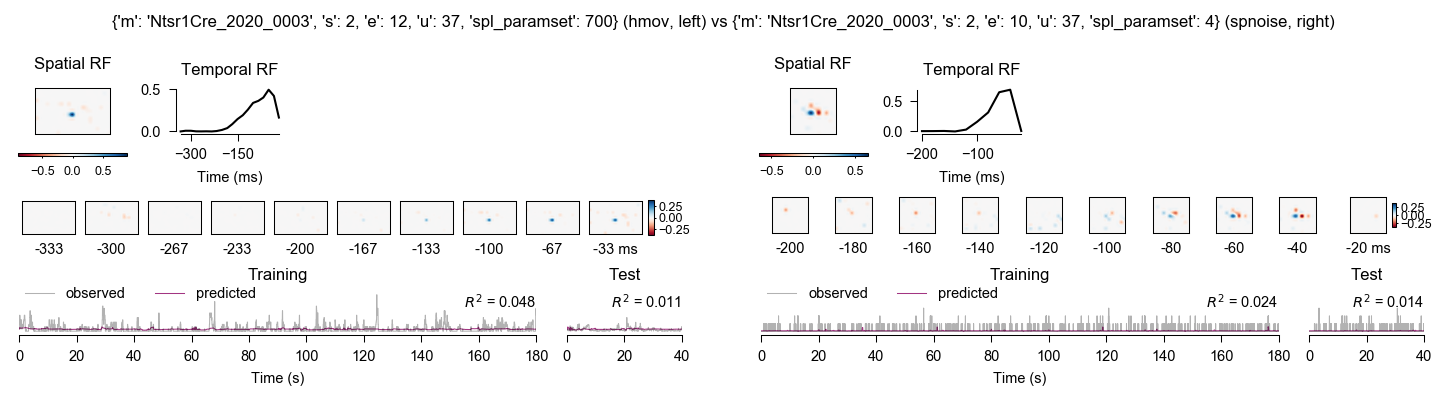

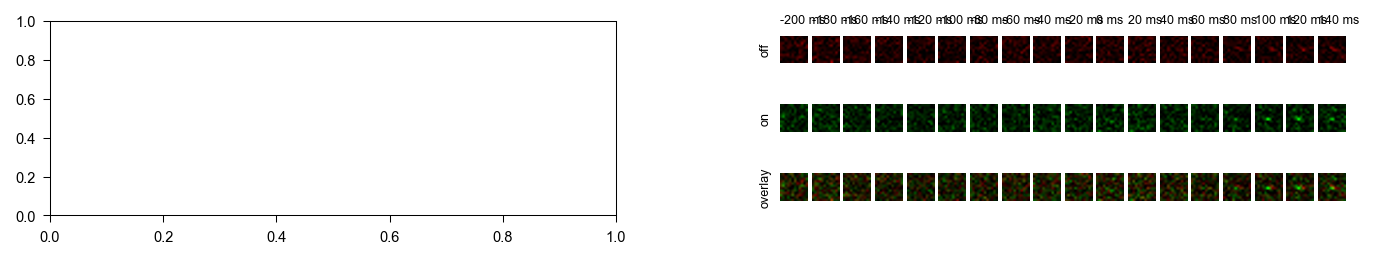

Unit 24/33
hmov key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 45, 'spl_paramset': 700}
  hmov RF pos (x,y): (12, 6)
  hmov RF QI: 0.808017
  hmov RF area: 152.357
spnoise key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 10, 'u': 45, 'spl_paramset': 4}
  spnoise RF pos (x,y): (5, 5)
  spnoise RF QI: 0.648929
  spnoise RF area: 200.813
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 45}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


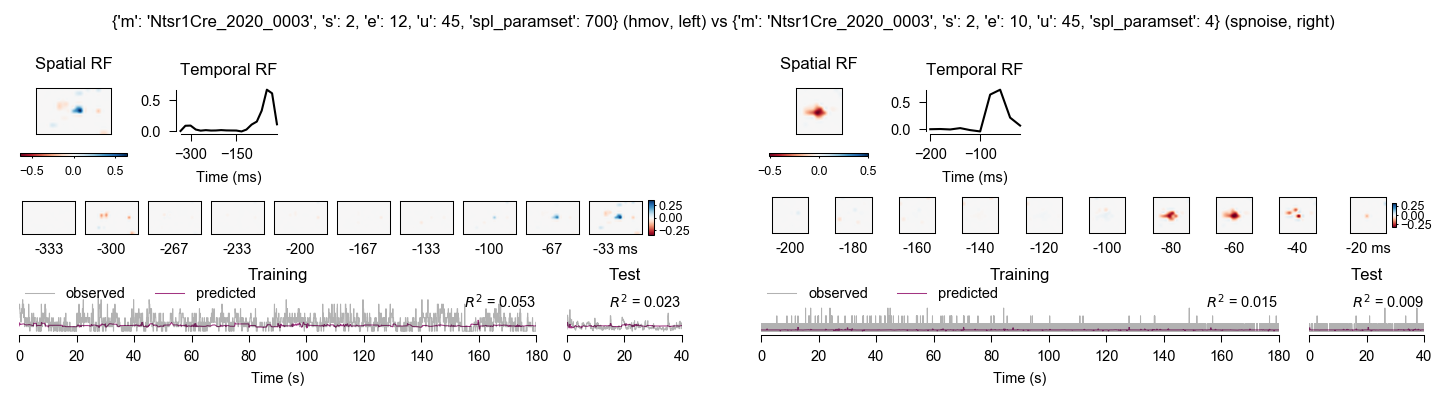

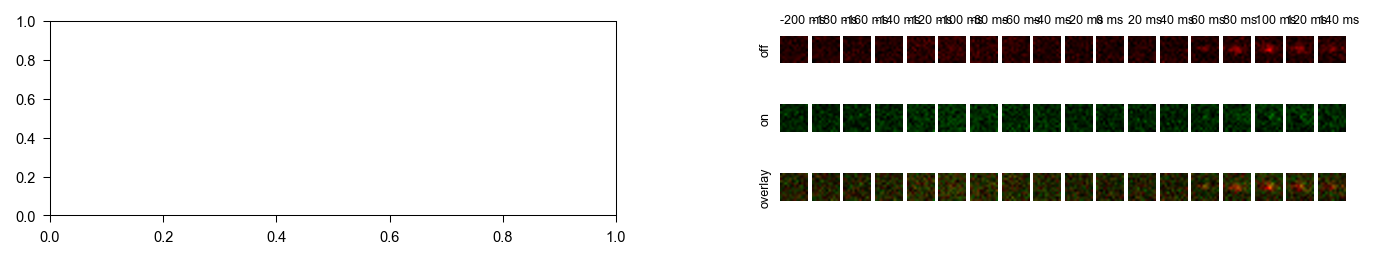

Unit 25/33
hmov key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 51, 'spl_paramset': 700}
  hmov RF pos (x,y): (14, 9)
  hmov RF QI: 0.454655
  hmov RF area: 23.6243
spnoise key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 10, 'u': 51, 'spl_paramset': 3}
  spnoise RF pos (x,y): (5, 7)
  spnoise RF QI: 0.36511
  spnoise RF area: 30.3907
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 51}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


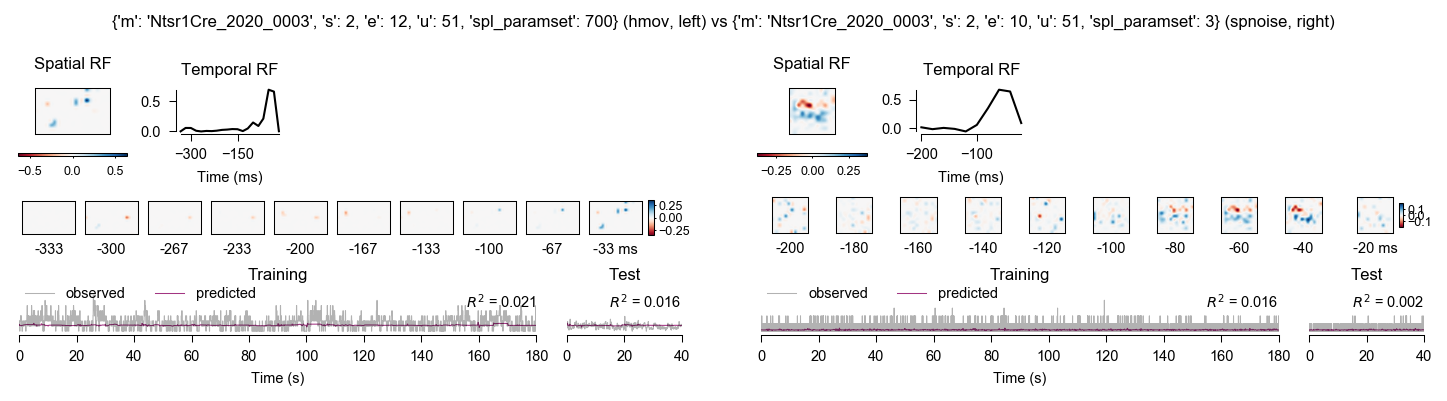

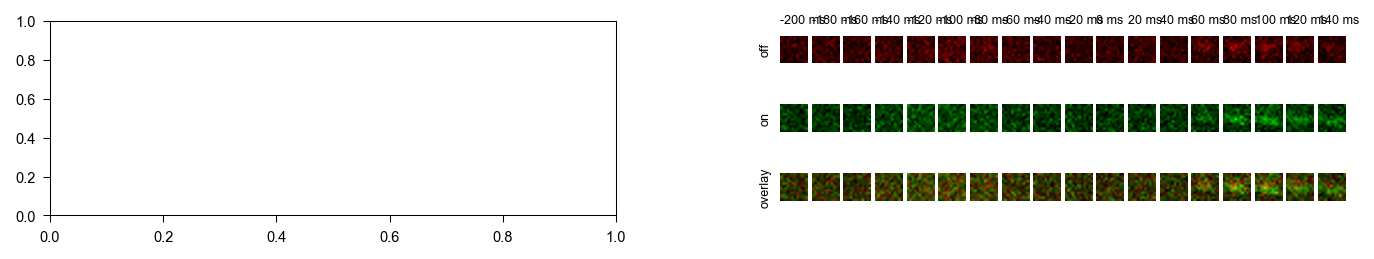

Unit 26/33
hmov key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 58, 'spl_paramset': 700}
  hmov RF pos (x,y): (8, 5)
  hmov RF QI: 0.789375
  hmov RF area: 63.6655
spnoise key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 10, 'u': 58, 'spl_paramset': 4}
  spnoise RF pos (x,y): (8, 5)
  spnoise RF QI: 0.218859
  spnoise RF area: 8.59931
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 58}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


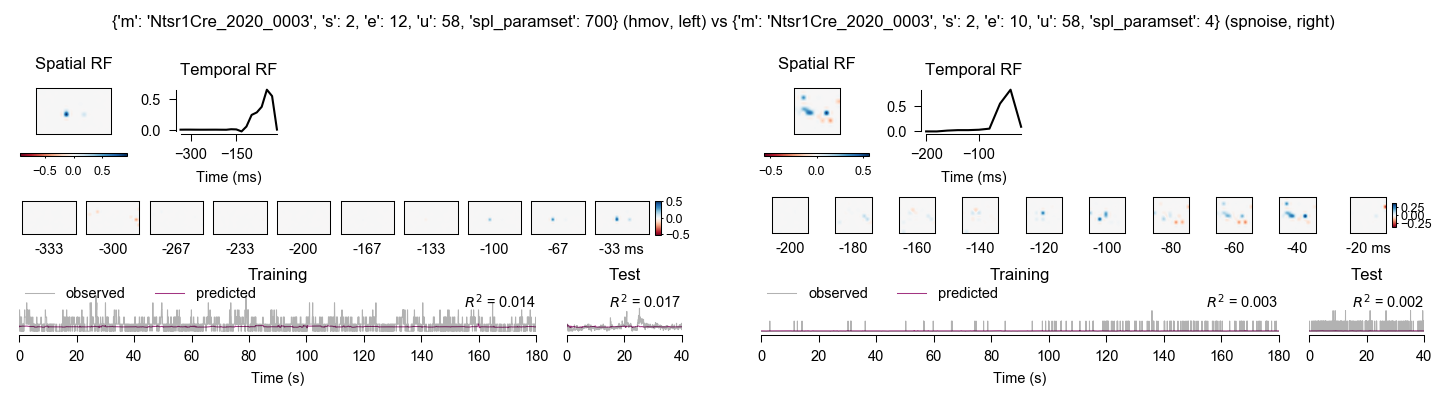

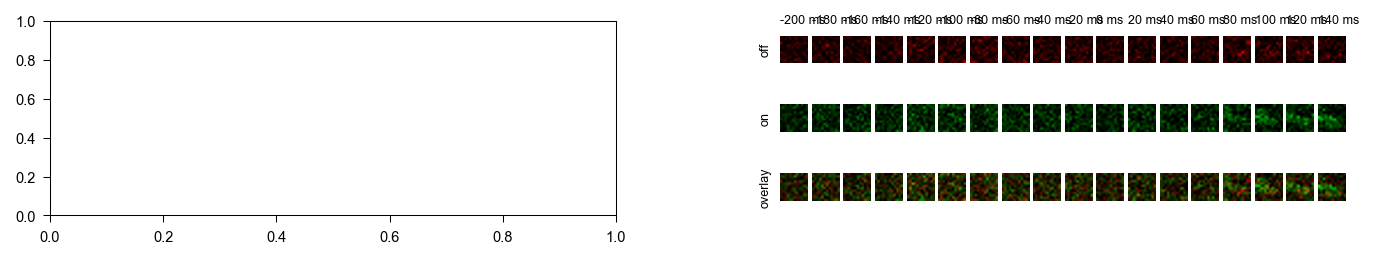

Unit 27/33
hmov key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 77, 'spl_paramset': 700}
  hmov RF pos (x,y): (9, 6)
  hmov RF QI: 0.226221
  hmov RF area: 15.4159
spnoise key = {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 10, 'u': 77, 'spl_paramset': 4}
  spnoise RF pos (x,y): (7, 5)
  spnoise RF QI: 0.624466
  spnoise RF area: 122.442
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0003', 's': 2, 'e': 12, 'u': 77}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


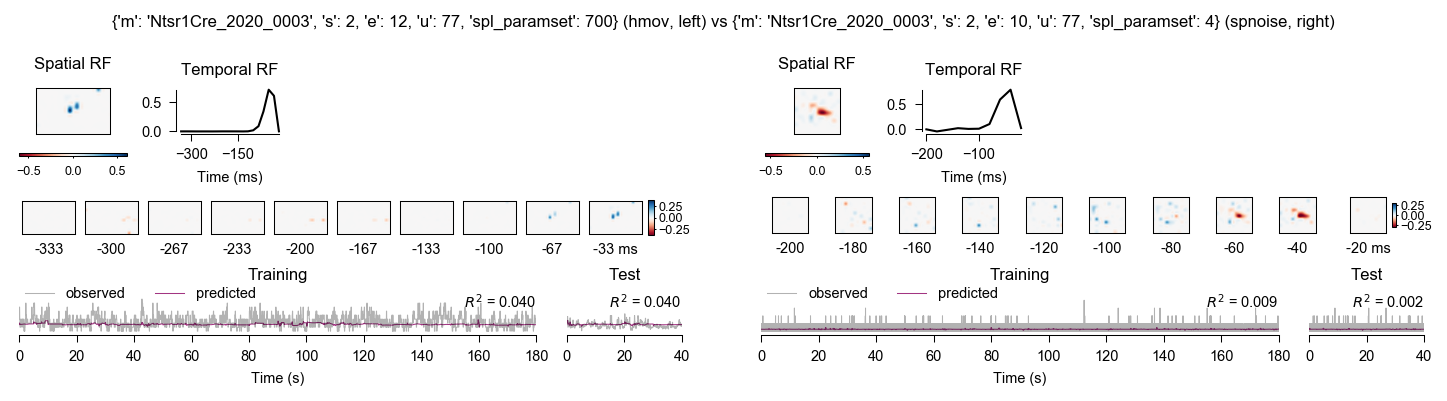

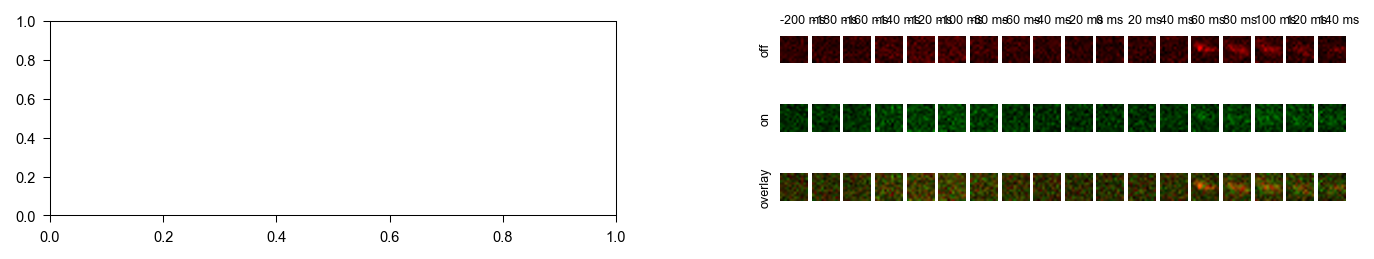

Unit 28/33
hmov key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 3, 'spl_paramset': 700}
  hmov RF pos (x,y): (7, 4)
  hmov RF QI: 0.412858
  hmov RF area: 18.6192
spnoise key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 9, 'u': 3, 'spl_paramset': 3}
  spnoise RF pos (x,y): (4, 6)
  spnoise RF QI: 0.6444
  spnoise RF area: 74.5599
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 3}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


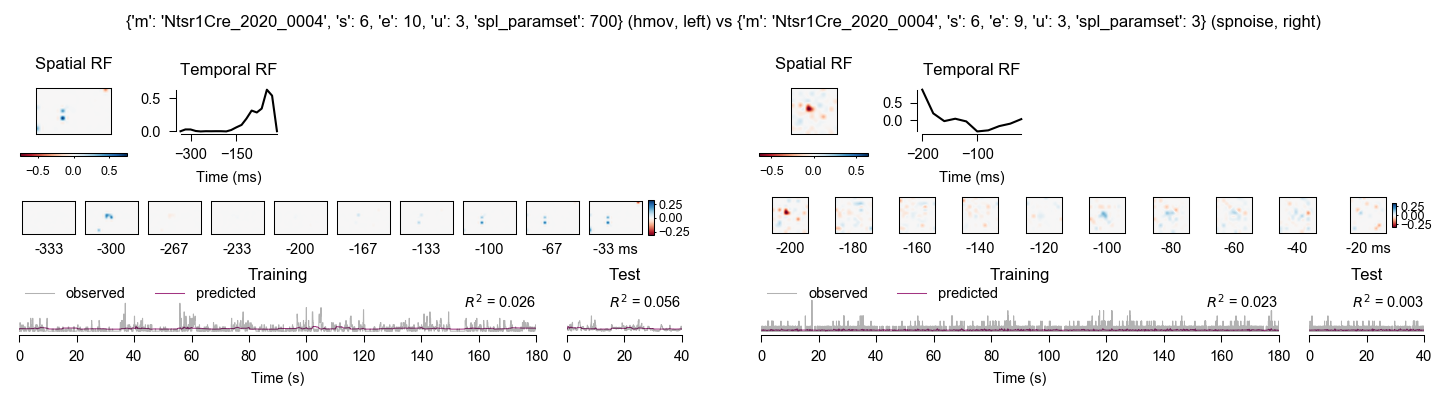

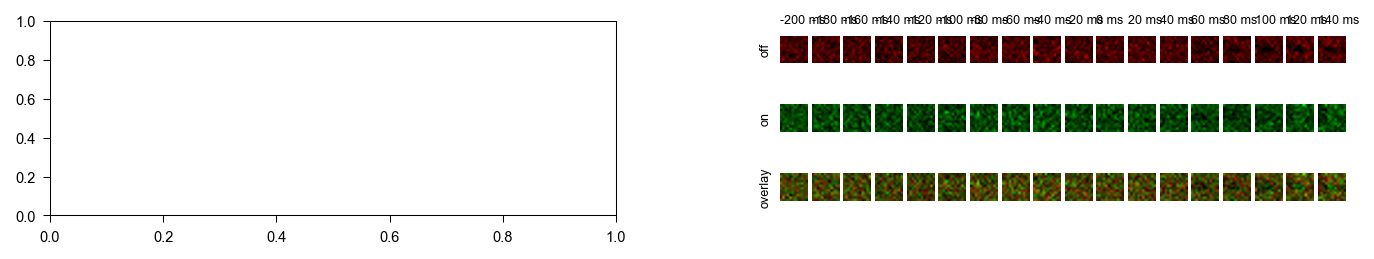

Unit 29/33
hmov key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 5, 'spl_paramset': 700}
  hmov RF pos (x,y): (9, 5)
  hmov RF QI: 0.767996
  hmov RF area: 48.3498
spnoise key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 9, 'u': 5, 'spl_paramset': 3}
  spnoise RF pos (x,y): (5, 5)
  spnoise RF QI: 0.709587
  spnoise RF area: 142.28
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 5}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


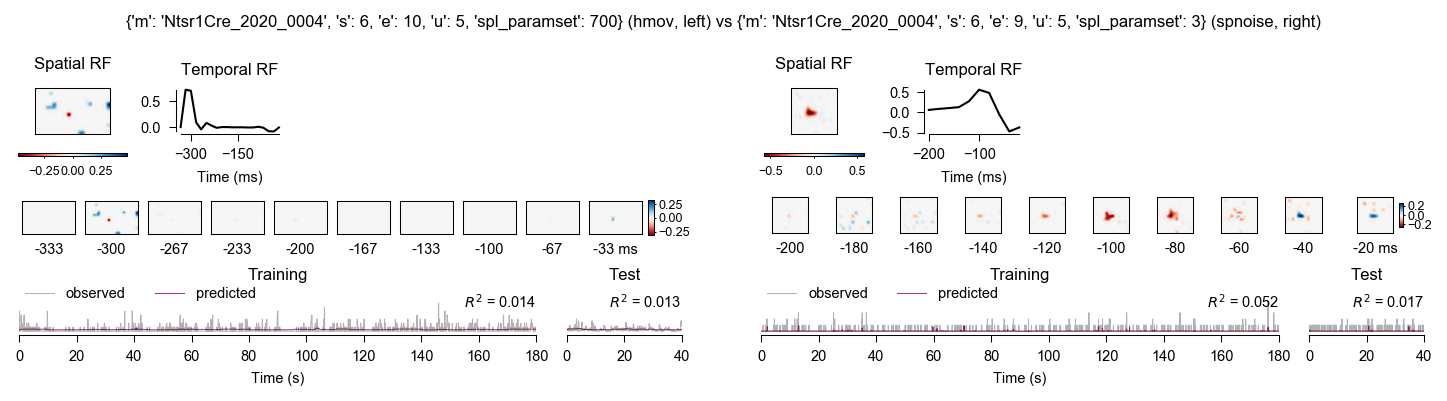

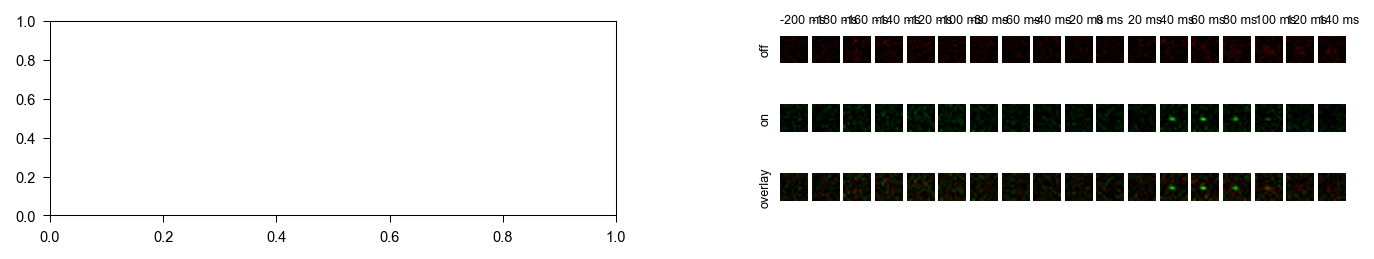

Unit 30/33
hmov key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 9, 'spl_paramset': 700}
  hmov RF pos (x,y): (11, 5)
  hmov RF QI: 0.447523
  hmov RF area: 26.227
spnoise key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 9, 'u': 9, 'spl_paramset': 4}
  spnoise RF pos (x,y): (4, 4)
  spnoise RF QI: 0.848249
  spnoise RF area: 62.7359
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 9}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


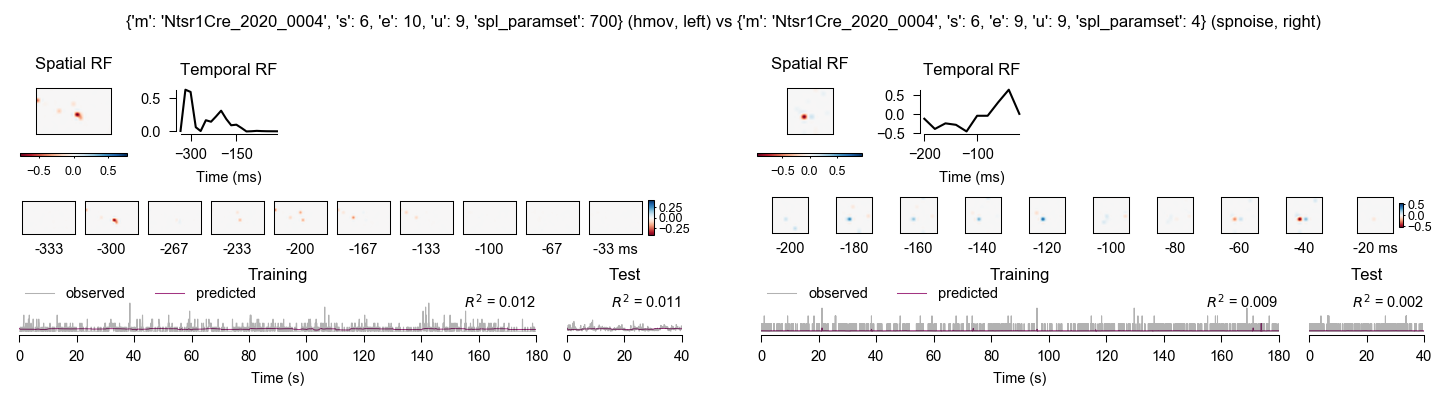

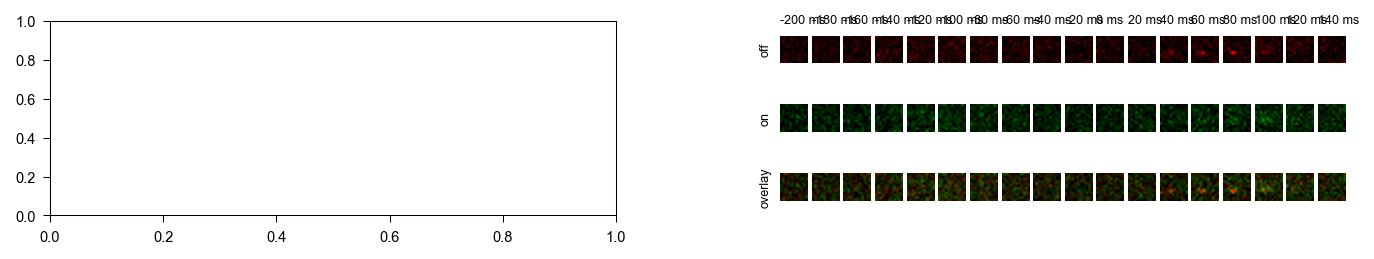

Unit 31/33
hmov key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 18, 'spl_paramset': 700}
  hmov RF pos (x,y): (9, 2)
  hmov RF QI: 0.840797
  hmov RF area: 124.828
spnoise key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 9, 'u': 18, 'spl_paramset': 4}
  spnoise RF pos (x,y): (5, 2)
  spnoise RF QI: 0.733164
  spnoise RF area: 121.856
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 18}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


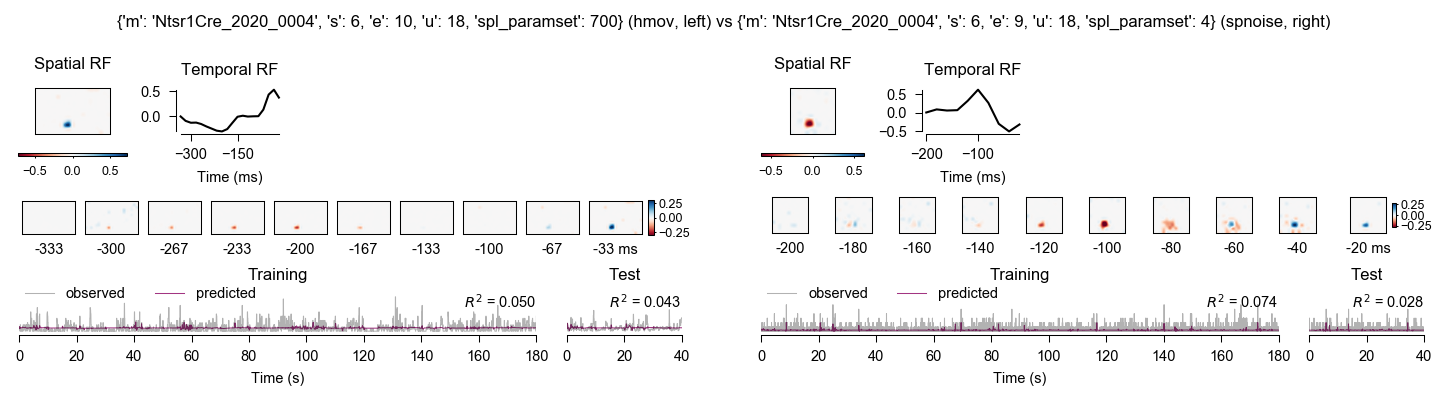

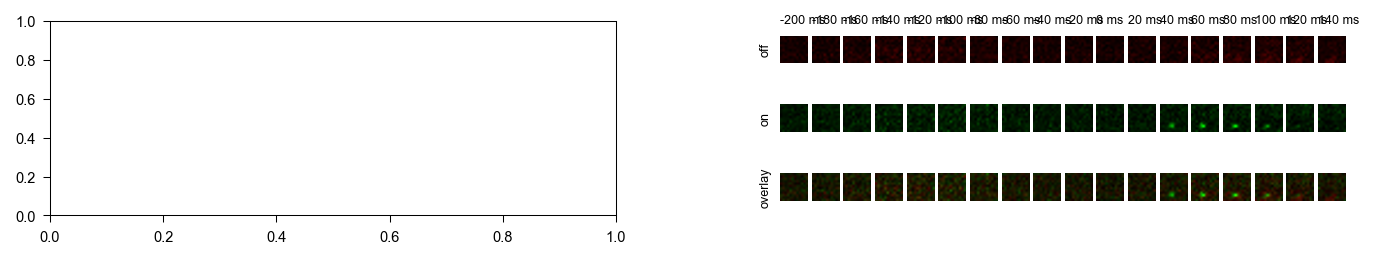

Unit 32/33
hmov key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 20, 'spl_paramset': 700}
  hmov RF pos (x,y): (8, 2)
  hmov RF QI: 0.807305
  hmov RF area: 139.544
spnoise key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 9, 'u': 20, 'spl_paramset': 4}
  spnoise RF pos (x,y): (4, 2)
  spnoise RF QI: 0.802068
  spnoise RF area: 86.5794
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 20}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


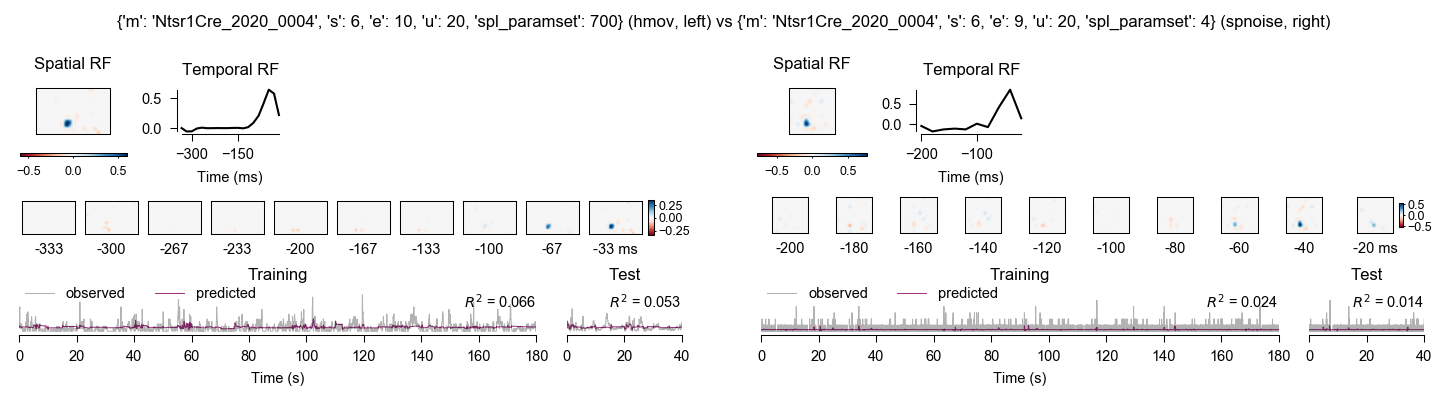

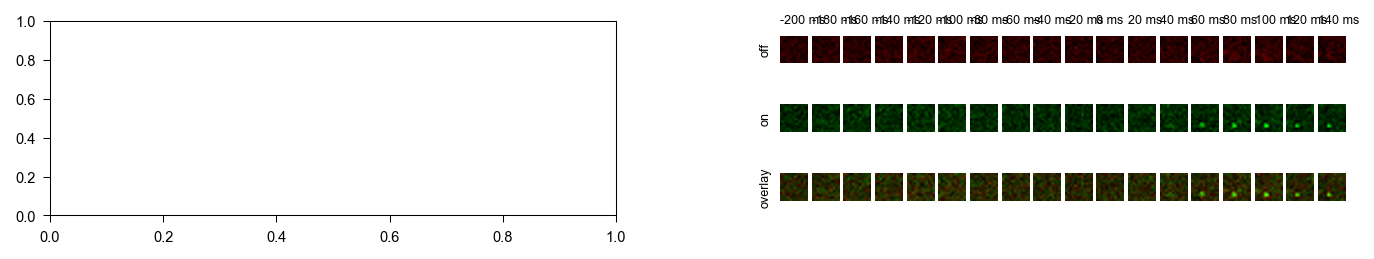

Unit 33/33
hmov key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 21, 'spl_paramset': 700}
  hmov RF pos (x,y): (1, 7)
  hmov RF QI: 0.443755
  hmov RF area: 22.7234
spnoise key = {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 9, 'u': 21, 'spl_paramset': 4}
  spnoise RF pos (x,y): (2, 3)
  spnoise RF QI: 0.595123
  spnoise RF area: 31.5634
No Hmov-stimTA for {'m': 'Ntsr1Cre_2020_0004', 's': 6, 'e': 10, 'u': 21}.


/Users/ybauer/code/djd/djd/unit.py:1752: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


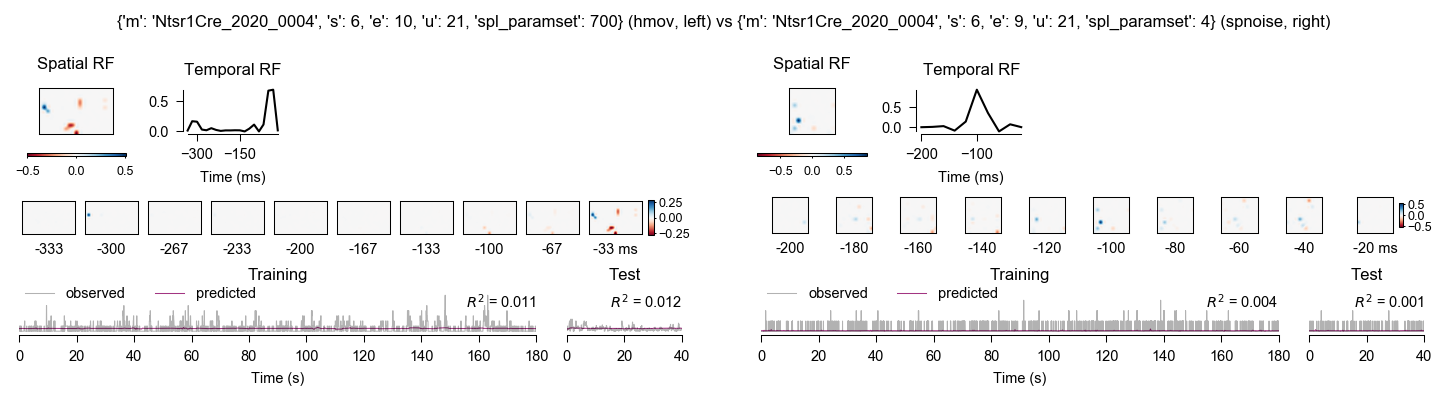

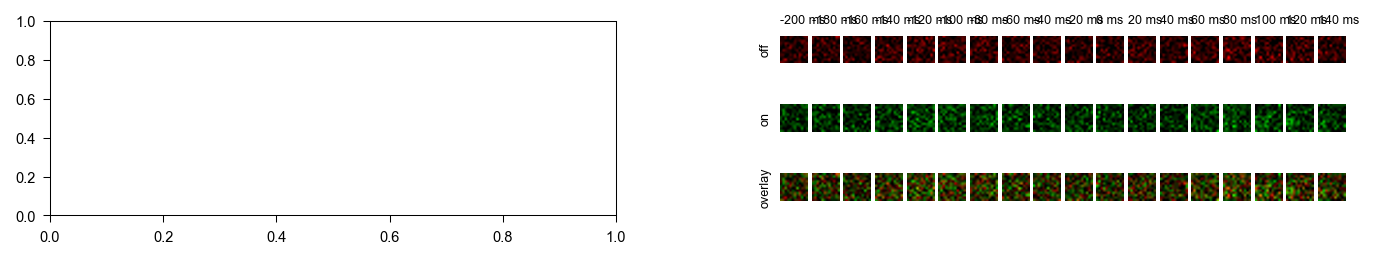

In [14]:
# Copy df to units df
units = df.copy()

## Plot paired hmov vs spnoise model per unit
for i, unit in units.iterrows():
    print(f"Unit {i+1}/{len(units)}")
    
    # Initialize figure (per unit)
    fig = plt.figure(figsize=cm2inch((24, 6.5)), dpi=150, constrained_layout=True)  # need to set constrained layout here!
#     fig = plt.figure(figsize=cm2inch((24, 10)), dpi=150, constrained_layout=True)  # need to set constrained layout here!
    gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig, width_ratios=[1, 0.1, 1])  # 2nd column just for subfig spacing

    # Plot hmov model
    try:
        key1 = {'m': unit.m, 's': unit.s, 'e': unit.e_x, 'u': unit.u, 'spl_paramset': unit.paramset_x}
        fig, axs = plot_model(key1, title=False, gs=gs[0])
        print(f'hmov key = {key1}')
        print(f'  hmov RF pos (x,y): ({unit.rf_x_pos_pix_x}, {unit.rf_y_pos_pix_x})')
        print(f'  hmov RF QI: {unit.rf_qi_x}')
        print(f'  hmov RF area: {unit.rf_area_x}')        
    except:
        print(f'No hmov-SplineLNP model for {key1}.')
        fig.add_subplot(gs[0])  # placeholder


    # Plot spnoise model
    try:
        key2 = {'m': unit.m, 's': unit.s, 'e': unit.e_y, 'u': unit.u, 'spl_paramset': unit.paramset_y}
        fig, axs = plot_model(key2, title=False, gs=gs[2])
        print(f'spnoise key = {key2}')
        print(f'  spnoise RF pos (x,y): ({unit.rf_x_pos_pix_y}, {unit.rf_y_pos_pix_y})')
        print(f'  spnoise RF QI: {unit.rf_qi_y}')
        print(f'  spnoise RF area: {unit.rf_area_y}')             
    except:
        print(f'No spnoise-SplineLNP model for {key2}.')
        fig.add_subplot(gs[2])  # placeholder


    fig.suptitle(f'{key1} (hmov, left) vs {key2} (spnoise, right)', fontsize=8)
    
    ## Plot STAs
    fig = plt.figure(figsize=cm2inch((24, 5)), dpi=150, constrained_layout=False)  # need new fig bc cannot do constr layout
    gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig, width_ratios=[1, 0.1, 1])  # 2nd column just for subfig spacing
    
    # Plot hmov STA
    try:
        key3 = {'m': unit.m, 's': unit.s, 'e': unit.e_x, 'u': unit.u}
        ax3 = fig.add_subplot(gs[0])
        (HmovUnit() & key3).plot_STA(plot_center=True, title=False, ax=ax3);  # cannot assign axis
    except:
        print(f'No Hmov-stimTA for {key3}.')
#         fig.add_subplot(gs[0])  # placeholder axis
#         ax_tmp = fig.add_subplot(gs[0])  # placeholder axis
#         adjust_spines(ax_tmp, None)  # make invisible 
    
    # Plot spnoise stimTA    
    try:
        key4 = {'m': unit.m, 's': unit.s, 'e': unit.e_y, 'u': unit.u}
        (Unit.Spikes() & key4).sta(tstart=-0.2, tstop=0.15, tres=0.02, precision=3, ticks=None,
                          direction='stimta', ticklabelsize=6, titlesize=6, ylabelsize=6, gs=gs[2]);
    except:
        print(f'No spnoise-stimTA for {key4}.')
        fig.add_subplot(gs[2])  # placeholder

    plt.show()